# Projet 3 : Concevoir une application au service de la santé publique

# Notebook de nettoyage des données
Dabidin Keshika

## Contexte
 L'agence "Santé publique France" a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation.
 
## Objectifs 

Il est demandé dans un premier temps de traiter le jeu de données en réfléchissant à une **idée d’application** tout en repérant des **variables pertinentes** pour les traitements à venir, et nécessaires pour  l'idée d’application. Ensuite, il est demandé de procéder à une analyse des données nettoyées pour concrétiser l'idée d'application. 

**Ce premier notebook comportera de la partie 'nettoyage des données' :**

Le nettoyage des données mettera en évidence les éventuelles valeurs manquantes et traitera ces valeurs manquantes de façon différente, ce qui dépendra du type de variable concerné. Les valeurs abbérantes seront également identifiées et traitées. On utilisera finalement des algorithmes d'imputation KNN ou de régression  pour remplacer certaines valeurs manquantes. 

**Un deuxième notebook traitera la partie analyse des données ainsi que l'idée d'application de santé.**


# 1.  Les données 

Les données ont été obtenues sur le site de Open Food Facts qui est une ressource libre. 

Les variables sont définies à cette adresse : https://world.openfoodfacts.org/data/data-fields.txt
Les champs sont séparés en quatre sections :

1. Les informations générales sur la fiche du produit : nom, date de modification, etc.
2. Un ensemble de tags : catégorie du produit, localisation, origine, etc.
3. Les ingrédients composant les produits et leurs additifs éventuels.
4. Des informations nutritionnelles : quantité en grammes d’un nutriment pour 100 grammes du produit.

###  Descriptif détaillé des données 

#### Types de données:

- Les données se terminant par **_t** sont le nombre de secondes écroulées depuis le 1er Janvier 1970 (format UNIX)

- Les données se terminant par **_datetime**  sont les dates en iso8601 sous le format: yyyy-mm-ddThh:mn:ssZ

- Les données se terminant par **_tags** sont des valeurs ou des libéllés séparés par des virgules.

- Les données se terminant par  un code sous la forme de deux lettre , exemple, *_fr* pour la France, représentent les libellés dans ce language précis.

- Les données se terminant par **_100g** correspondent à la quantité de nutriments (en g ou ou KJ pour l'énergie) pour 100g ou 100mL du produit. 

- Les données se terminant par **with_serving** correspondent à la quantité de nutriments (en g ou ou KJ pour l'énergie) pour 1 portion du produit. 


#### Liste détaillée des colonnes :

##### Informations générales sur le produit :

- **code** : barcode du produit of the product 
- **url** : url du produit sur le site de "Open Food Facts"
- **creator** : ID de celui qui a ajouté le produit 
- **created_t** : date d'ajout du produit (format UNIX)
- **created_datetime** : date d'ajout du produit (format iso8601 :yyyy-mm-ddThh:mn:ssZ ) 
- **last_modified_t** : date de dernière modification du produit (format UNIX)
- **last_modified_datetime** : date de dernière modification du produit (format iso8601 :yyyy-mm-ddThh:mn:ssZ ) 
- **product_name** : nom du produit
- **generic_name** : nom générique du produit
- **quantity** : quantité du produit

##### Libellés :

- **packaging et packaging_tags** : Forme et matériaux
- **brands et brands_tags** : marque du produit
- **categories, categories_tags et categories_fr** : catégorie du produit
- **origins et origins_tags** : origine des ingrédients
- **manufacturing_places et manufacturing_places_tags** : endroits où les produits ont été manufacturés ou transformés
- **labels, labels_tags et labels_fr** : libellés associés aux produits
- **emb_codes et emb_codes_tags** : codes de embed du produit
- **first_packaging_code_geo** : coordonnées du premier endroit d'emballage du produit
- **cities et cities_tags** : villes associées au produit
- **purchase_places** : endroits qui rachètent le produit
- **stores** : magasin ou le produit est disponible
- **countries, countries_tags et countries_fr** : liste de pays ou le produit est vendu.

##### Ingredients:

- **ingredients_text** : liste des ingrédients
- **traces et traces_tags** : traces présents

##### Autre types de données:

- **serving_size** : taille de portion
- **no_nutriments** : indique si descriptif des nutriments est inclu dans le libellé du produit
- **additives et additives_n** : nombre d'additifs dans les produits
- **ingredients_from_palm_oil, ingredients_from_palm_oil_n, ingredients_from_palm_oil_tags, ingredients_that_may_be_from_palm_oil, ingredients_that_may_be_from_palm_oil_n, ingredients_that_may_be_from_palm_oil_tags **: nombre d'ingradients qui peuvent provenir de l'huile de palme.
- **nutrition_grade_fr** : Nutrigrade de 'a' à 'e'  (https://fr.openfoodfacts.org/nutriscore)
- **main_category et main_category_fr** : catégorie du produit
- **image_url et image_small_url** : lien pour avoir une image du produit

##### Liste des nutriments:

Voici la liste des nutriments qui pourrait être utile dans notre idée d'application : 

- **energy_100g, energy-kj_100g et energy-kcal_100g** : énergie donnée par portion de 100g
- **proteins_100g**: protéines

- **carbohydrates_100g** : glucides
- **sugars_100g** : sucres
- **fat_100g** : graisse alimentaire
- **saturated-fat_100g** : graisses saturées
- **trans-fat_100g** : graisses insaturées
- **cholesterol_100g** : cholestérol présent
- **fiber_100g** : fibres
- **sodium_100g** : sel minéral
- **iron_100g** : fer minéral
- **calcium_100g** : calcium minéral
- **vitamin-a_100g** : vitamine a
- **vitamin-c_100g** : vitamine c
- **nutrition-score-fr_100g** : Nutri-Score - Nutrition score calculé depuis les recherches du Professeur Hercberg
- **nutrition-score-uk_100g** : nutrition score au Royaume Unis d'après le Food Standards Administration (FSA)


Il y a également d'autres catégories de nutriments présents dans le jeu de données mais qui ne seront pas utilisés dans ce projet dû au manque de données : 

- casein_100g
- serum-proteins_100g
- nucleotides_100g

- sucrose_100g
- glucose_100g
- fructose_100g

- lactose_100g
- maltose_100g
- maltodextrins_100g
- starch_100g
- polyols_100g


- butyric-acid_100g
- caproic-acid_100g
- caprylic-acid_100g
- capric-acid_100g
- lauric-acid_100g
- myristic-acid_100g
- palmitic-acid_100g
- stearic-acid_100g
- arachidic-acid_100g
- behenic-acid_100g
- lignoceric-acid_100g
- cerotic-acid_100g
- montanic-acid_100g
- melissic-acid_100g
- monounsaturated-fat_100g
- polyunsaturated-fat_100g
- omega-3-fat_100g
- alpha-linolenic-acid_100g
- eicosapentaenoic-acid_100g
- docosahexaenoic-acid_100g
- omega-6-fat_100g
- linoleic-acid_100g
- arachidonic-acid_100g
- gamma-linolenic-acid_100g
- dihomo-gamma-linolenic-acid_100g
- omega-9-fat_100g
- oleic-acid_100g
- elaidic-acid_100g
- gondoic-acid_100g
- mead-acid_100g
- erucic-acid_100g
- nervonic-acid_100g

- alcohol_100g : % vol of alcohol

- vitamin-d_100g
- vitamin-e_100g
- vitamin-k_100g
- vitamin-b1_100g
- vitamin-b2_100g
- vitamin-pp_100g
- vitamin-b6_100g
- vitamin-b9_100g
- vitamin-b12_100g
- biotin_100g: also known as Vitamine B8
- pantothenic-acid_100g: also known as Vitamine B5
- fruits-vegetables-nuts_100g : % of fruits, vegetables and nuts (excluding potatoes, yams, manioc)

- silica_100g
- bicarbonate_100g
- potassium_100g
- chloride_100g
- phosphorus_100g
- magnesium_100g
- zinc_100g
- copper_100g
- manganese_100g
- fluoride_100g
- selenium_100g
- chromium_100g
- molybdenum_100g
- iodine_100g

- caffeine_100g
- taurine_100g
- ph_100g : pH (no unit)

- carbon-footprint_100g : carbon footprint (as indicated on the packaging of some products)



# 2. Lecture des données

In [11]:
# Importation des librairies utiles pour l'analyse et la visualisation des données

import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
#Lecture des données

products=pd.read_csv("products.csv",sep='\t',low_memory=False )

In [3]:
pd.set_option('display.max_columns', None)
products.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ]

In [4]:
if 'Unnamed: 0' in products.columns:
    products.drop('Unnamed: 0', axis=1, inplace=True)

# 3. Description général des données brutes

In [5]:
products.shape

(320772, 162)

Le fichier contient **320772 produits et 162 colonnes**. 

In [6]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


Les données sont soit de type 'float' soit de type 'object'. 

Voici la liste des  **colonnes** : 

In [7]:
pd.set_option('display.max_rows', 162)
products.dtypes

code                                           object
url                                            object
creator                                        object
created_t                                      object
created_datetime                               object
last_modified_t                                object
last_modified_datetime                         object
product_name                                   object
generic_name                                   object
quantity                                       object
packaging                                      object
packaging_tags                                 object
brands                                         object
brands_tags                                    object
categories                                     object
categories_tags                                object
categories_fr                                  object
origins                                        object
origins_tags                

Les noms des colonnes sont attribuées explicitement.

Il apparaît en première lecture que certaines ont un intérêt dans le cadre de la consitution de la base de données mais pas pour l'analyse des données (cf. *descriptif des données*). 

D'autres variables semblent être présentées sous différentes formes. Dans ce cas de figure nous pouvons citer categories, labels, origins, countries par exemple, qui sont présentées en version anglaise et française. 

Dans le cadre du nettoyage nous ferons en sorte d'éviter la redondance d'informations. Il pourrait s'avérer nécessaire de supprimer certaines variables.

# 4. Exploration des descriptifs statistiques de chaque colonne 

In [8]:
products.describe().T

,count,mean,std,min,25%,50%,75%,max
no_nutriments,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
additives_n,248939.0,1.936024,2.502019e+00,0.000000,0.000000e+00,1.000000,3.000000,3.100000e+01
ingredients_from_palm_oil_n,248939.0,0.019659,1.405241e-01,0.000000,0.000000e+00,0.000000,0.000000,2.000000e+00
ingredients_from_palm_oil,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ingredients_that_may_be_from_palm_oil_n,248939.0,0.055246,2.692074e-01,0.000000,0.000000e+00,0.000000,0.000000,6.000000e+00
ingredients_that_may_be_from_palm_oil,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nutrition_grade_uk,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
energy_100g,261113.0,1141.914605,6.447154e+03,0.000000,3.770000e+02,1100.000000,1674.000000,3.251373e+06
energy-from-fat_100g,857.0,585.501214,7.128099e+02,0.000000,4.940000e+01,300.000000,898.000000,3.830000e+03
fat_100g,243891.0,12.730379,1.757875e+01,0.000000,0.000000e+00,5.000000,20.000000,7.142900e+02


Certaines colonnes de variables sont complètement vides et n'ont pas de données. On fera en sorte de les supprimées car elles ne sont pas pertinentes pour la suite. 

In [9]:
# describe the categorical data
products.describe(include=object).T

,count,unique,top,freq
code,320749,320749,3222110022391,1
url,320749,320749,http://world-fr.openfoodfacts.org/produit/0073...,1
creator,320770,3535,usda-ndb-import,169868
created_t,320769,189567,1489055829,20
created_datetime,320763,189568,2017-03-09T10:37:09Z,20
last_modified_t,320772,180495,1439141742,33
last_modified_datetime,320772,180495,2015-08-09T17:35:42Z,33
product_name,303010,221347,Ice Cream,410
generic_name,52795,38584,Pâtes alimentaires au blé dur de qualité supér...,201
quantity,104819,13826,500 g,4669


La répartition des données n'est pas uniforme. En effet, on constate que certaines colonnes sont plus remplies que d'autres. On obtient certaines informations cepependant depuis les données présentes : 

- Ice cream et pâtes sont les types de produits qui apparaïssent le plus dans les noms de produits. 
- La marque Carrefour est la plus courante. 
- Beaucoup de produits sont produits ou sont d'origine de la France. 
- Quand il y a un libellé, celui-ci est Bio ou organique. 
- Les État Unis est le pays qui consomme le plus de produits.
- Les traces les plus présentes sont les 'Fruits à la coque'
- Les états et les groupes pnns sont inconnus pour la plupart.
- Il y a beaucoup de boissons dans les catégories. 

# 5. Tableau résumant le taux de remplissage des données

In [10]:
#Création d'un tableau résumant les données 
tableau_resume = pd.DataFrame(columns = ["Nombre lignes", "Nombre colonnes", "Taux remplissage moyen","Doublons"],
                                 index = ["products.csv"])

# Calcul du nombre de lignes dans chaque fichier
# La méthode .index() permet de calculer le nombre de lignes total pour chaque fichier
tableau_resume["Nombre lignes"] = [
    len(products.index)
]

# Calcul du nombre de colonnes dans chaque fichier
# La méthode .columns() permet de calculer le nombre de colonnes total pour chaque fichier
tableau_resume["Nombre colonnes"] = [
    len(products.columns)
]

# Fonction pour calculer le pourcentage de remplissage
def pourcentage(x):
    return "{0:.01f}%".format(x * 100)

# Calcul du taux de remplissage moyen
# On identifie les valeurs avec méthode .notna()
# On utilise la méthode .mean() deux fois : uns fois pour calculer la moyenne de chaque colonne et une deuxième fois pour calculer la moyenne du fichier
tableau_resume["Taux remplissage moyen"] = [
    pourcentage(products.notna().mean().mean())
]

# Calcul des doublons dans chaque fichier
# Les méthodes .duplicated() et .sum() permettent de retrouver les doublons et les sommer per fichier
tableau_resume["Doublons"] = [
    products.duplicated(subset=["code"]).sum()
]

tableau_resume

,Nombre lignes,Nombre colonnes,Taux remplissage moyen,Doublons
products.csv,320772,162,23.8%,22


Le taux de remplisspage des données est de 23,8 % et il y a des doublons. 

#### Supprimons les doublons : 

In [11]:
data=products.copy() # Création d'une copie du fichier pour effectuer le nettoyage des données 
data=data.drop_duplicates(subset='code', keep="last")

In [12]:
#Fonction pour résumer les données de data

def tableau_resume(data):
    #Création d'un tableau résumant les données 
    tableau_resume = pd.DataFrame(columns = ["Nombre lignes", "Nombre colonnes", "Taux remplissage moyen","Doublons"],index=["data"])
    
# Calcul du nombre de lignes dans chaque fichier
# La méthode .index() permet de calculer le nombre de lignes total pour chaque fichier
    tableau_resume["Nombre lignes"] = [
        len(data.index)
    ]
# Calcul du nombre de colonnes dans chaque fichier
# La méthode .columns() permet de calculer le nombre de colonnes total pour chaque fichier
    tableau_resume["Nombre colonnes"] = [
        len(data.columns)
    ]
# Fonction pour calculer le pourcentage de remplissage
    def pourcentage(x):
        return "{0:.01f}%".format(x * 100)
# Calcul du taux de remplissage moyen
# On identifie les valeurs avec méthode .notna()
# On utilise la méthode .mean() deux fois : uns fois pour calculer la moyenne de chaque colonne et une deuxième fois pour calculer la moyenne du fichier
    tableau_resume["Taux remplissage moyen"] = [
        pourcentage(data.notna().mean().mean())
    ]
# Calcul des doublons dans chaque fichier
# Les méthodes .duplicated() et .sum() permettent de retrouver les doublons et les sommer per fichier
    tableau_resume["Doublons"] = [
        data.duplicated(subset=["code"]).sum()
    ]
    return tableau_resume

tableau_resume(data)

,Nombre lignes,Nombre colonnes,Taux remplissage moyen,Doublons
data,320750,162,23.8%,0


**On a bien supprimé les doublons avec le même code.**

Voici le détail du type de données dans chaque colonne : 

In [13]:
data.dtypes

code                                           object
url                                            object
creator                                        object
created_t                                      object
created_datetime                               object
last_modified_t                                object
last_modified_datetime                         object
product_name                                   object
generic_name                                   object
quantity                                       object
packaging                                      object
packaging_tags                                 object
brands                                         object
brands_tags                                    object
categories                                     object
categories_tags                                object
categories_fr                                  object
origins                                        object
origins_tags                

# 6. Traitement des données manquantes et des valeurs aberrantes

Il existe plusieurs méthodes pour traiter les données manquantes ou les valeurs aberrantes qui sont notamment : 

- Éliminer les données manquantes en utilisant la méthode *dropna()*.
- Remplacer les valeurs manquantes par *fillna()* avec des valeurs de son choix.
- Remplacer les valeurs manquantes par la moyenne, le mode ou la médianne. 
- Remplacer les valeurs manquantes avec un algorithme du voisin le plus proche (KNN) ou un algorithme de régression.

Afin de faire un premier tri rapide des variable, nous allons créer une fonction qui calculera le **% de données manquantes de chaque variable**. Cette fonction sera utilisée à plusieurs reprises lors des différentes étapes du nettoyage.

## (a)  Repérage des données manquantes 

In [14]:
#Nombre de données manquantes par colonne
data.isnull().sum()

code                                               1
url                                                1
creator                                            2
created_t                                          0
created_datetime                                   2
last_modified_t                                    0
last_modified_datetime                             0
product_name                                   17762
generic_name                                  267976
quantity                                      215949
packaging                                     241790
packaging_tags                                241789
brands                                         28390
brands_tags                                    28398
categories                                    236360
categories_tags                               236361
categories_fr                                 236360
origins                                       298581
origins_tags                                  

In [15]:
# Fonction pour calculer le pourcentage de données manquantes avec classement en ordre décroissant 

def missing(data):
    products_dict = {}
    
    for col in data.columns:
        products_dict[col] = []
        products_dict[col].append(round((data[col].isnull().sum()/data.shape[0])*100,2))
        products_dict[col].append(data[col].isna().sum())
        
    return pd.DataFrame.from_dict(data=products_dict, orient="index", columns = ["Pourcentage Valeurs Manquantes", "Nombre de valeurs manquantes"]).sort_values(by="Pourcentage Valeurs Manquantes", ascending=False)

#Application de la formule une première fois
missing(data)

,Pourcentage Valeurs Manquantes,Nombre de valeurs manquantes
water-hardness_100g,100.00,320750
caproic-acid_100g,100.00,320750
dihomo-gamma-linolenic-acid_100g,100.00,320749
serum-proteins_100g,100.00,320734
ingredients_from_palm_oil,100.00,320750
ingredients_that_may_be_from_palm_oil,100.00,320750
nutrition_grade_uk,100.00,320750
maltodextrins_100g,100.00,320739
maltose_100g,100.00,320746
nervonic-acid_100g,100.00,320750


On constate que certaines colonnes ont 100% de données manquantes et ne sont pas forcément utiles. On va supprimer ces colonnes pour car elles n'apportent pas d'informations supplémentaires. On va donc les supprimer. On peut envisager de **supprimer aussi les données qui ont plus de 60% des données manquantes** car ce sont des colonnes qui nous ne serviront pas à l'étude.

Le choix de 60% est un compromis entre le pourcentage de données remplies (au moins 50%) et les colonnes qui même s'il elles ont plus de 50% de données manquantes contiennent des informations utiles telles que les vitamines c, pour notre idée d'application et des colonnes pour lesquelles on pourra envisager d'imputer des valeurs. 


## (b) Premier tri avec la supression des colonnes qui ont trop de données manquantes

In [16]:
# Supprimer les colonnes contenant plus d'un pourcentage de valeurs manquantes 

#Fonction pour supprimer les colonnes à partir d'un seuil pourcentage défini
def supprimer_colonnes(data,perc_seuil):
    pct_null = data.isnull().sum() / len(data)*100
    missing_features = pct_null[pct_null >= perc_seuil].index
    data.drop(missing_features, axis=1, inplace=True)
    return data

#Suppression les colonnes qui ont 100% de données manquantes
data=supprimer_colonnes(data,60)
missing(data)

,Pourcentage Valeurs Manquantes,Nombre de valeurs manquantes
vitamin-a_100g,57.11,183196
iron_100g,56.21,180288
vitamin-c_100g,56.08,179883
calcium_100g,56.02,179700
trans-fat_100g,55.32,177452
cholesterol_100g,55.08,176660
additives_fr,51.78,166070
additives_tags,51.78,166070
fiber_100g,37.37,119864
serving_size,34.12,109441


###  Résumé du fichier 

In [17]:
tableau_resume(data)

,Nombre lignes,Nombre colonnes,Taux remplissage moyen,Doublons
data,320750,42,78.1%,0


On constate que le taux de remplissage moyen des données est maintenant à 78,1%. 

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320750 entries, 0 to 320771
Data columns (total 42 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   code                                     320749 non-null  object 
 1   url                                      320749 non-null  object 
 2   creator                                  320748 non-null  object 
 3   created_t                                320750 non-null  object 
 4   created_datetime                         320748 non-null  object 
 5   last_modified_t                          320750 non-null  object 
 6   last_modified_datetime                   320750 non-null  object 
 7   product_name                             302988 non-null  object 
 8   brands                                   292360 non-null  object 
 9   brands_tags                              292352 non-null  object 
 10  countries                       

Selon les besoins de l'application que l'on souhaite concevoir, il va falloir effectuer un choix sur les colonnes à conserver. 

On constate que certaines colonnes représentent le même type d'informations, par exemple, "nutrition-score-uk", "nutrition-score-france" et "nutri_grade_france". De plus, le % d'information manquante est la même pour les trois types de colonnes. On conservera donc une seule colonne,ici, "nutrition-score-fr".


En poursuivant le même raisonnement, on constate qu'il y a deux types de colonnes qui donnent des informations sur la date de création des données du produit et la date de la dernière modification des données du produit. On conservera soit les données du type datetime ou bien de type _t. On effectuera le choix de conserver ceux de type datetime. 

Finalement, on appliquera le raisonnement sur le reste du tableau et on choisira de conserver les colonnes suivantes pour l'application : 

- code
- url
- states_fr
- created_datetime
- last_modified_datetime
- creator
- countries_fr
- product_name
- brands
- energy_100g
- proteins_100g
- sodium_100g
- additives_n
- sugars_100g
- carbohydrates_100g
- fat_100g
- saturated-fat_100g
- fiber_100g
- calcium_100g
- vitamin-c_100g
- iron_100g
- vitamin-a_100g
- nutrition-score-fr_100g

- nutrition_grade_fr
- ingredients_text
- ingredients_from_palm_oil_n


In [19]:
# Données conservées
new_data= data[['code','url', 'states_fr', 'created_datetime',
        'last_modified_datetime','creator', 'product_name', 'brands','countries_fr',
       'ingredients_text', 'serving_size', 'additives_n',
       'ingredients_from_palm_oil_n', 'energy_100g', 'fat_100g',
       'saturated-fat_100g','carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'sodium_100g', 'calcium_100g',
        'vitamin-c_100g','iron_100g','vitamin-a_100g','nutrition-score-fr_100g','nutrition_grade_fr'
               ] ]

In [20]:
new_data.columns

Index(['code', 'url', 'states_fr', 'created_datetime',
       'last_modified_datetime', 'creator', 'product_name', 'brands',
       'countries_fr', 'ingredients_text', 'serving_size', 'additives_n',
       'ingredients_from_palm_oil_n', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'sodium_100g', 'calcium_100g', 'vitamin-c_100g',
       'iron_100g', 'vitamin-a_100g', 'nutrition-score-fr_100g',
       'nutrition_grade_fr'],
      dtype='object')

## (c) Supression des valeurs aberrantes

In [21]:
# Données à filter
filtered_data=new_data.copy()
filtered_data.shape

(320750, 27)

Les données contiennent **320750 produits et 27 colonnes**. 

In [22]:
filtered_data.head()

,code,url,states_fr,created_datetime,last_modified_datetime,creator,product_name,brands,countries_fr,ingredients_text,serving_size,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g,nutrition-score-fr_100g,nutrition_grade_fr
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles à com...",2016-09-17T09:17:46Z,2016-09-17T09:18:13Z,openfoodfacts-contributors,Farine de blé noir,Ferme t'y R'nao,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,usda-ndb-import,Banana Chips Sweetened (Whole),NaN,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,0.0,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.000,0.000,0.0214,0.00129,0.0,14.0,d
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,usda-ndb-import,Peanuts,Torn & Glasser,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,0.0,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.250,0.071,0.0000,0.00129,0.0,0.0,b
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:35:31Z,2017-03-09T10:35:31Z,usda-ndb-import,Organic Salted Nut Mix,Grizzlies,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,0.0,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,0.482,0.143,NaN,0.00514,NaN,12.0,d
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:34:13Z,2017-03-09T10:34:13Z,usda-ndb-import,Organic Polenta,Bob's Red Mill,États-Unis,Organic polenta,35 g (0.25 cup),0.0,0.0,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN


additives_n
Skew : 2.18


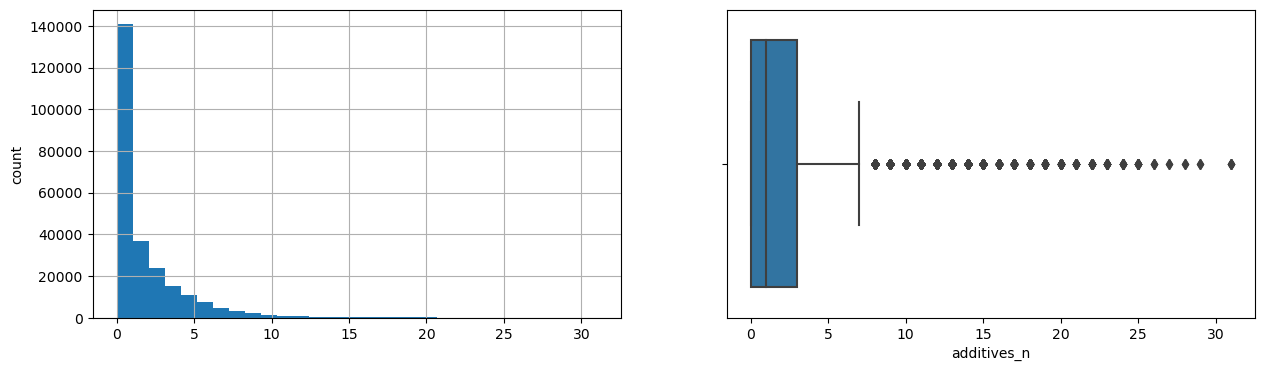

energy_100g
Skew : 491.0


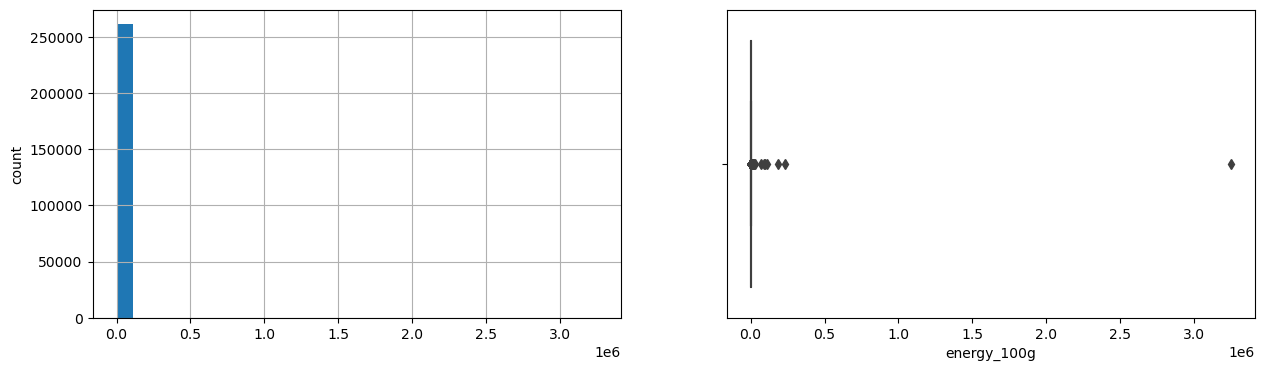

fat_100g
Skew : 2.46


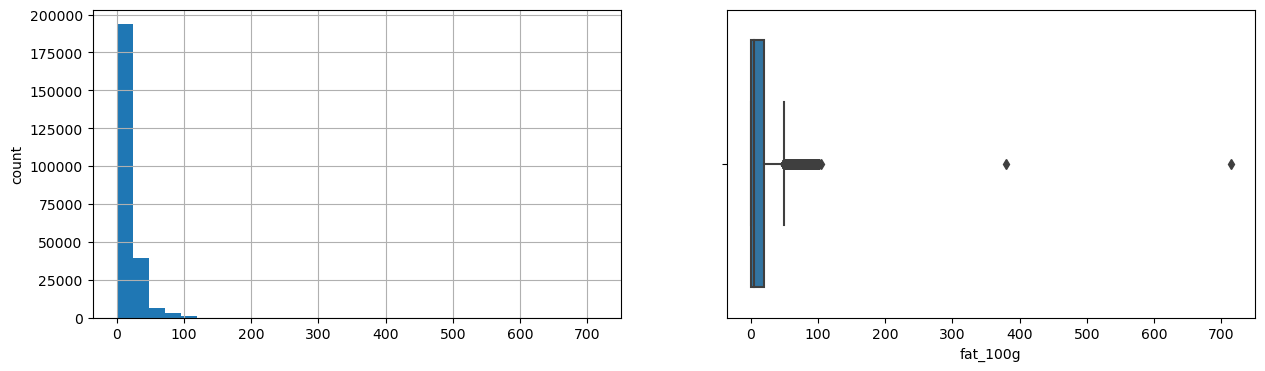

saturated-fat_100g
Skew : 4.82


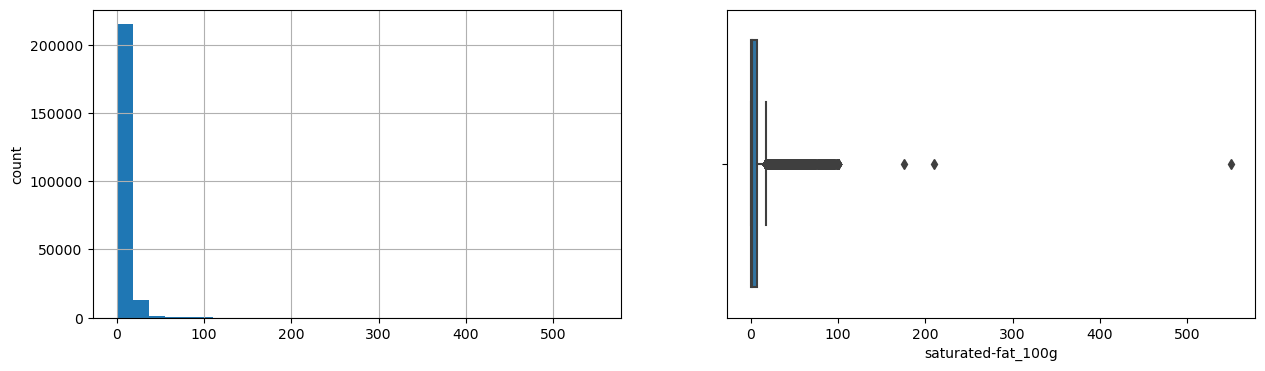

carbohydrates_100g
Skew : 4.28


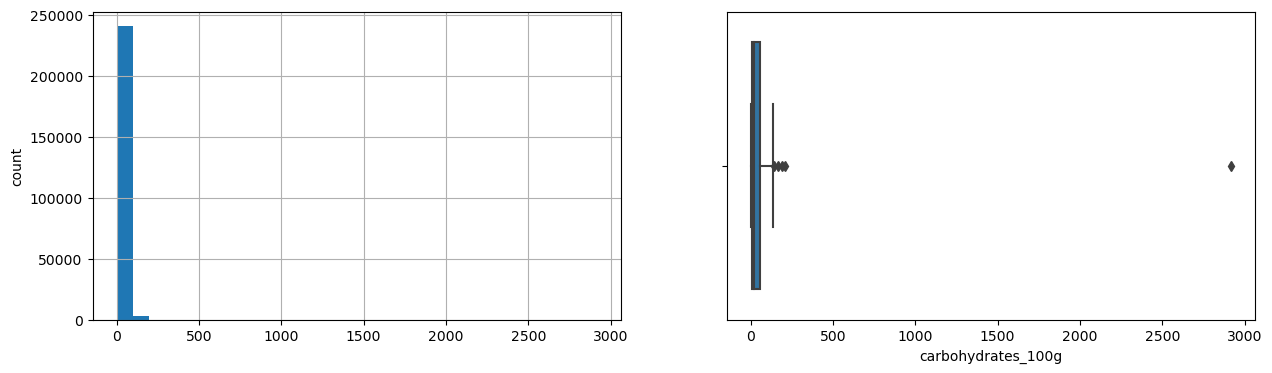

sugars_100g
Skew : 17.2


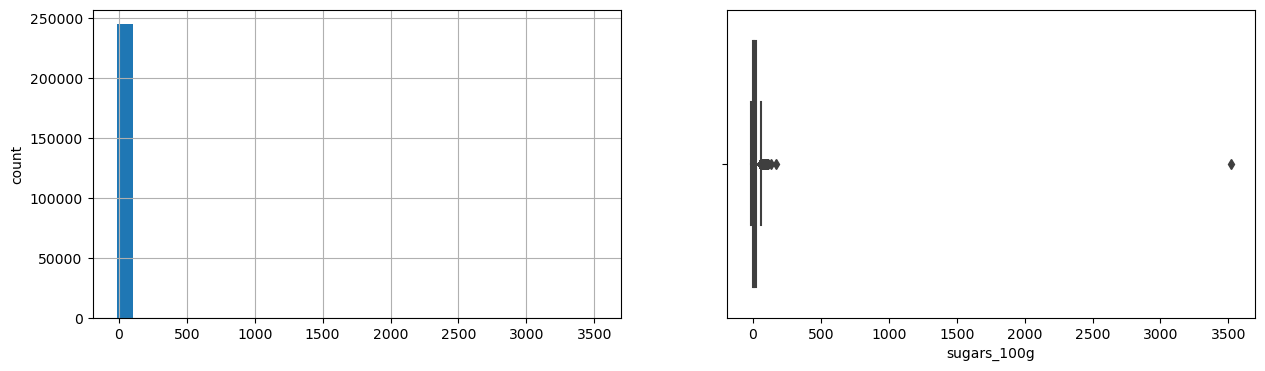

fiber_100g
Skew : 363.55


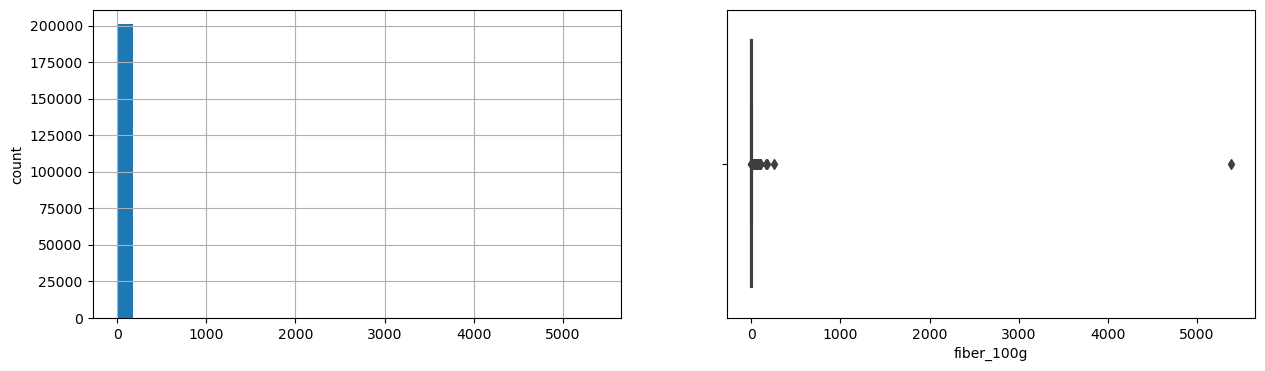

proteins_100g
Skew : -1.81


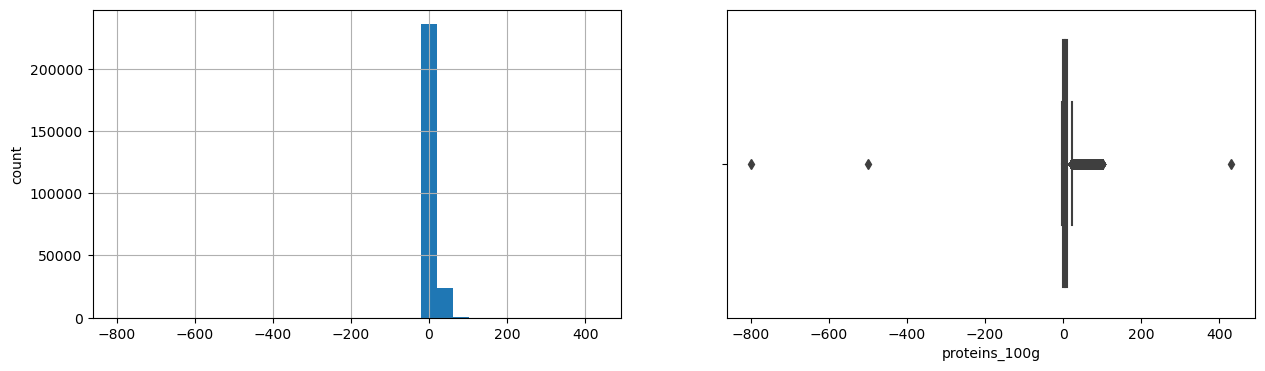

sodium_100g
Skew : 493.46


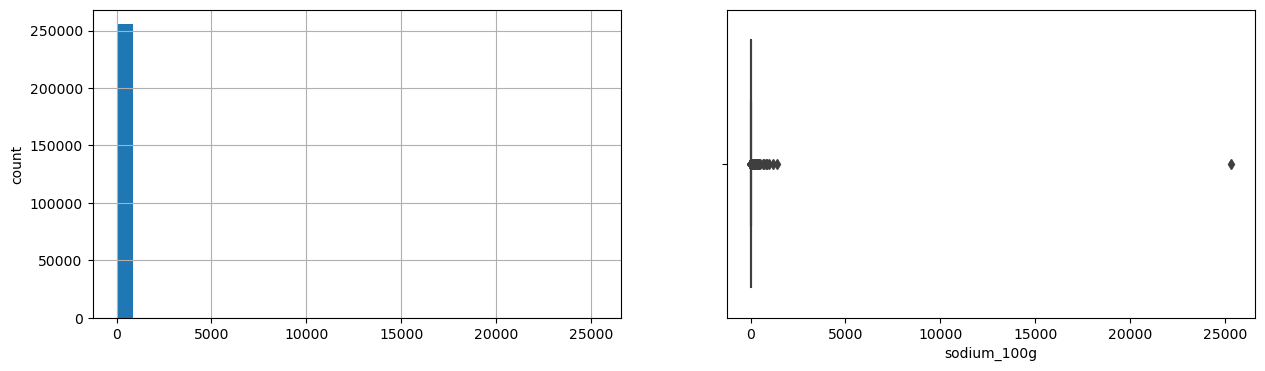

nutrition-score-fr_100g
Skew : 0.11


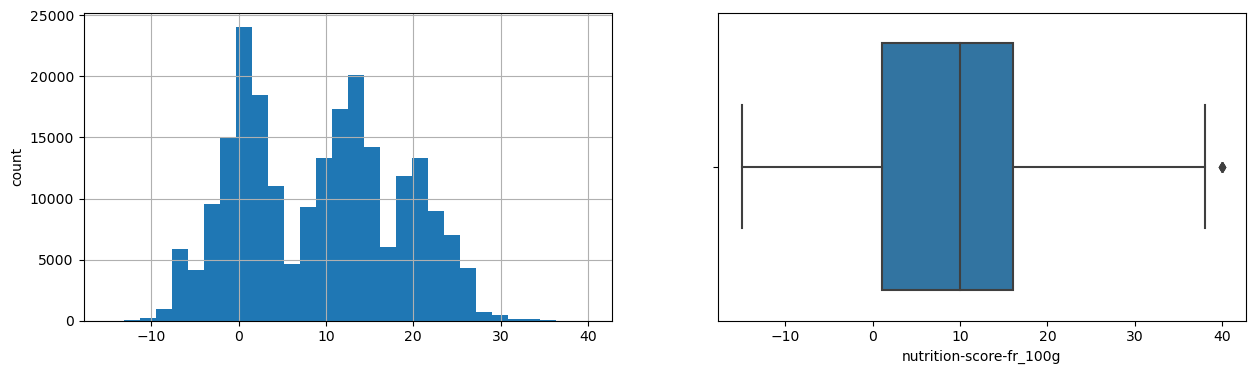

calcium_100g
Skew : 161.32


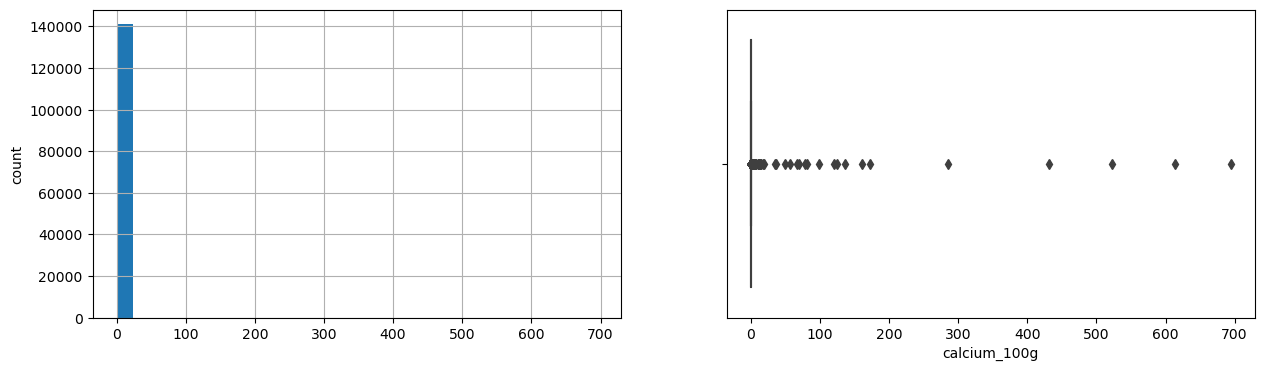

iron_100g
Skew : 186.51


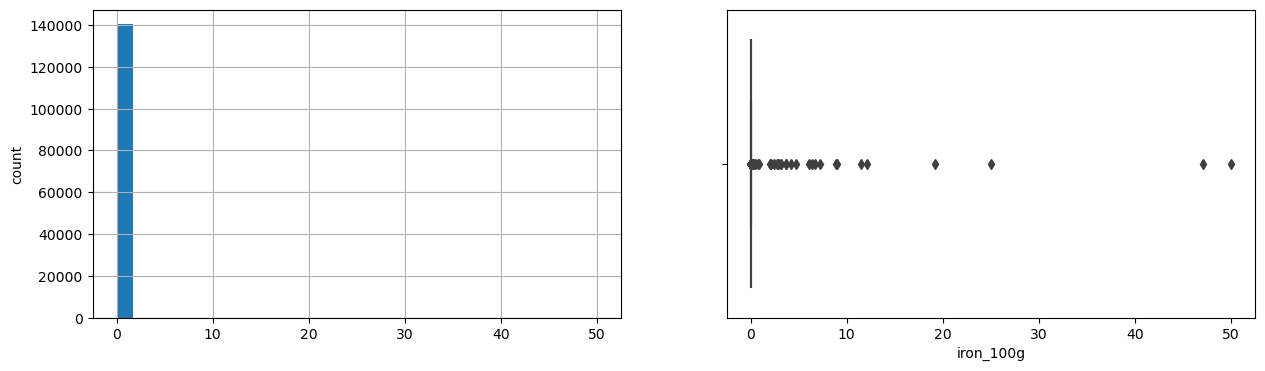

vitamin-c_100g
Skew : 269.53


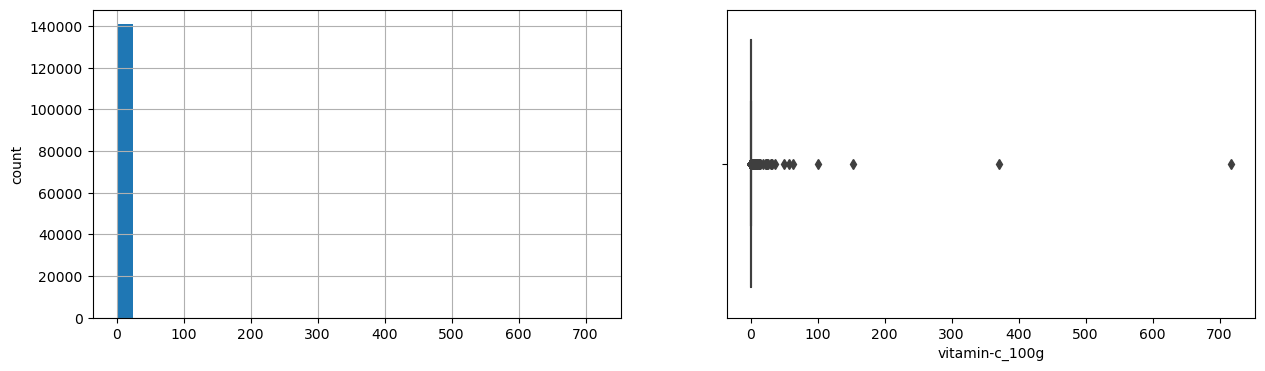

vitamin-a_100g
Skew : 353.98


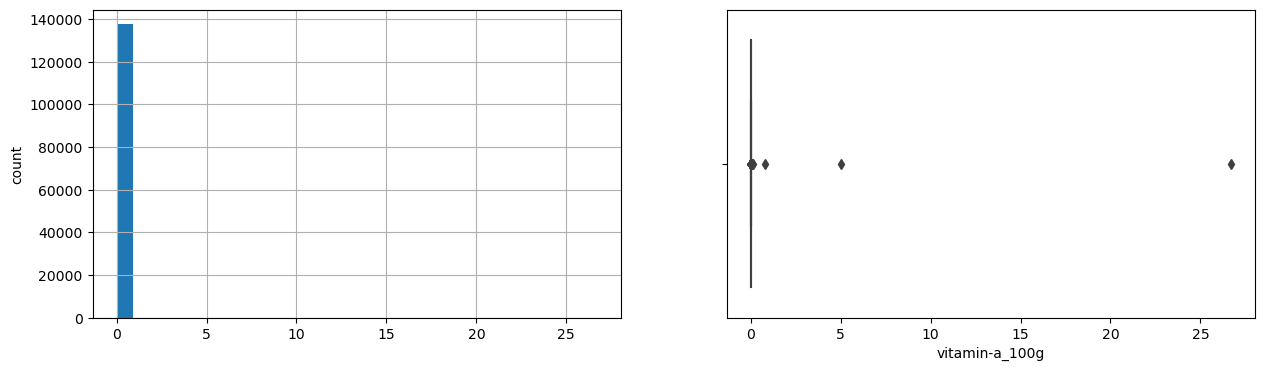

In [23]:
#Liste de variables numériques
num_col = ['additives_n', 
        'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g','sodium_100g', 'nutrition-score-fr_100g', 
        'calcium_100g','iron_100g','vitamin-c_100g','vitamin-a_100g'
          ]

# Affichage des distributions et des boxplots pour les données
for col in num_col:   
    print(col)
    print('Skew :',round(filtered_data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=30)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=col, data = filtered_data)
    plt.show()

D'après la nomenclature des données, les variables nutritionnelles mesurées en grammes (variables dont le nom se termine par _100g, hormis energy_100g) ne peuvent pas avoir des valeurs supérieures à 100g car l'aliment pèse 100g au total. Attention les minéraux sont données en mg, donc, ce sera un seuil 100 000.  On va donc visualiser ces valeurs aberrantes : 

In [24]:
outliers_100g = filtered_data[(filtered_data["proteins_100g"] > 100)
                              | (filtered_data["sugars_100g"] > 100)
                              | (filtered_data["fat_100g"] > 100)
                              | (filtered_data["saturated-fat_100g"] > 100)
                              | (filtered_data["carbohydrates_100g"] > 100)
                              | (filtered_data["sodium_100g"] > 100000)
                              | (filtered_data["calcium_100g"] > 100000)
                              | (filtered_data["iron_100g"] > 100000)
                              | (filtered_data["vitamin-c_100g"] > 100)
                              | (filtered_data["vitamin-a_100g"] > 100)
                              | (filtered_data["fiber_100g"] > 100)
                             ] 

print(f"Nombre d'observations avec une ou plusieurs valeurs supérieures à 100 sur les variables nutritionnelles: {outliers_100g.shape[0]}")
print("5 premières valeurs aberrantes: ")
display(outliers_100g.head())

Nombre d'observations avec une ou plusieurs valeurs supérieures à 100 sur les variables nutritionnelles: 29
5 premières valeurs aberrantes: 


,code,url,states_fr,created_datetime,last_modified_datetime,creator,product_name,brands,countries_fr,ingredients_text,serving_size,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g,nutrition-score-fr_100g,nutrition_grade_fr
64352,0052287000419,http://world-fr.openfoodfacts.org/produit/0052...,"A compléter,Informations nutritionnelles compl...",2017-03-09T14:09:35Z,2017-03-09T14:09:37Z,usda-ndb-import,"Chef Merito, Creole Style Adobo",Chef Merito Inc.,États-Unis,"Salt, msg (a natural flavor enhancer derived f...",0.6 g (0.125 tsp),1.0,0.0,699.0,NaN,NaN,NaN,NaN,166.7,11.67,28.75000,NaN,0.01000,NaN,0.000000,NaN,NaN
71000,0070552801110,http://world-fr.openfoodfacts.org/produit/0070...,"A compléter,Informations nutritionnelles compl...",2017-03-09T13:22:39Z,2017-03-09T13:22:39Z,usda-ndb-import,"Toaster Pastries, Strawberry",Winco Foods,États-Unis,"Enriched wheat flour (wheat flour, niacin, red...",32 g (32 g),8.0,0.0,2615.0,NaN,6.250,209.38,46.88,3.1,6.25,0.59400,0.0,0.00000,0.0,0.000469,25.0,e
73668,0070896329158,http://world-fr.openfoodfacts.org/produit/0070...,"A compléter,Informations nutritionnelles compl...",2015-08-27T10:55:18Z,2017-02-01T17:37:55Z,stephane,Icing Decorations,Wilton,États-Unis,NaN,"2,5 g",NaN,NaN,1680.0,0.000,NaN,120.00,80.00,NaN,0.00,0.00000,NaN,NaN,NaN,NaN,NaN,NaN
111566,01364008,http://world-fr.openfoodfacts.org/produit/0136...,"A vérifier,Complet,Informations nutritionnelle...",2015-01-18T21:51:30Z,2017-03-23T19:22:54Z,tacinte,Tomato Ketchup,Heinz,États-Unis,"Tomato concentrate from red ripe tomatoes, dis...",17 g,0.0,0.0,2510.0,0.588,0.588,136.00,134.00,0.0,7.06,0.00417,0.0,0.00706,0.0,0.000176,17.0,d
112681,0201203040026,http://world-fr.openfoodfacts.org/produit/0201...,"A compléter,Informations nutritionnelles compl...",2017-03-09T09:58:09Z,2017-03-09T09:58:09Z,usda-ndb-import,Premium Extra Virgin Olive Oil,Eliki,États-Unis,Extra virgin olive oil.,14 g (1 Tbsp),0.0,0.0,110579.0,714.290,100.000,NaN,0.00,0.0,0.00,0.00000,NaN,NaN,NaN,NaN,20.0,e


Supprimons toutes les observations ayant une ou plusieurs valeurs de variables nutritionelles supérieures à 100g car elles ne sont pas très nombreuses et ne conviennent pas à la norme de 100g. 

In [25]:
filtered_data.drop(axis=0, index=outliers_100g.index, inplace=True)
print(f"Nombre d'observations restantes {filtered_data.shape[0]}")

Nombre d'observations restantes 320721


On peut en déduire que les valeurs sur la variable au dessus de 3900Kcal/100g (*référence : site de santé publique France*) sont aberrantes pour energy_100g. Visualisons le nombre des observations dans ce cas de figure et affichons en le premières.

In [26]:
energy_outliers = filtered_data[filtered_data["energy_100g"] > 3900]
print(f"Nombre d'observations ayant des valeurs aberrantes sur la variable energy_100g: {energy_outliers.shape[0]}")
print("5 premières valeurs aberrantes sur la variable energy_100g")
display(energy_outliers.head())

Nombre d'observations ayant des valeurs aberrantes sur la variable energy_100g: 160
5 premières valeurs aberrantes sur la variable energy_100g


,code,url,states_fr,created_datetime,last_modified_datetime,creator,product_name,brands,countries_fr,ingredients_text,serving_size,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g,nutrition-score-fr_100g,nutrition_grade_fr
772,0008274333381,http://world-fr.openfoodfacts.org/produit/0008...,"A compléter,Informations nutritionnelles compl...",2017-03-09T13:46:15Z,2017-03-09T13:46:15Z,usda-ndb-import,Ginger Candy Sweetened With Raw Cane,Reed's Inc.,États-Unis,"Diced baby ginger root, raw cane sugar.",10 g (10 g),0.0,0.0,4435.0,0.00,NaN,90.00,90.00,NaN,0.00,0.000,NaN,NaN,NaN,NaN,NaN,NaN
5440,0011150090834,http://world-fr.openfoodfacts.org/produit/0011...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:27:27Z,2017-03-09T10:27:27Z,usda-ndb-import,Traditional Dusseldorf Mustard,Roundy's,États-Unis,"Vinegar, water, mustard seed, salt, red pepper.",5 g (1 tsp),0.0,0.0,5690.0,0.00,NaN,0.00,0.00,NaN,0.00,1.300,NaN,NaN,NaN,NaN,NaN,NaN
14399,0018894004806,http://world-fr.openfoodfacts.org/produit/0018...,"A compléter,Informations nutritionnelles compl...",2017-03-09T15:26:13Z,2017-03-09T15:26:13Z,usda-ndb-import,Honey Peanuts,Big Y Foods Inc.,États-Unis,"Peanuts, sugar, honey, salt, peanut oil, corn ...",28 g (1 ONZ),0.0,0.0,4335.0,82.14,10.71,21.43,17.86,7.1,21.43,0.232,0.0,0.0,0.00129,0.0,20.0,e
15660,0019962333026,http://world-fr.openfoodfacts.org/produit/0019...,"A compléter,Informations nutritionnelles compl...",2017-03-09T14:55:20Z,2017-03-09T14:55:20Z,usda-ndb-import,Tamalito Candy,Rainbow Games Inc,États-Unis,"Sugar, corn syrup, chilli, iodized salt, citri...",10 g (0.35 ONZ),2.0,0.0,5439.0,0.00,0.00,90.00,80.00,0.0,0.00,0.160,0.0,0.0,0.00000,0.0,21.0,e
19668,0022506235809,http://world-fr.openfoodfacts.org/produit/0022...,"A compléter,Informations nutritionnelles compl...",2017-03-10T10:24:08Z,2017-03-10T10:24:09Z,usda-ndb-import,Canola & Olive Spray Oil,The Hain Celestial Group Inc.,États-Unis,Mechanically (expeller) pressed refined canola...,1 ml (2 -3 SECOND DISPENSE),0.0,0.0,4184.0,100.00,0.00,0.00,NaN,NaN,0.00,0.000,NaN,NaN,NaN,NaN,NaN,NaN


Supprimons toutes les valeurs aberrantes sur la variable energy_100g aussi. 

In [27]:
filtered_data.drop(axis=0, index=energy_outliers.index, inplace=True)
filtered_data = filtered_data.reset_index(drop=True)
print(f"Nombre d'observations restantes: {filtered_data.shape[0]}")

Nombre d'observations restantes: 320561


Les valeurs de proteines ne peuvent pas être négatives, on va les afficher. 

In [28]:
outliers_proteines= filtered_data[(filtered_data["proteins_100g"] < 0)]

print(f"Nombre d'observations avec une ou plusieurs valeurs négatives pour les proteines: {outliers_proteines.shape[0]}")
print("5 premières valeurs aberrantes: ")
display(outliers_proteines.head())

Nombre d'observations avec une ou plusieurs valeurs négatives pour les proteines: 3
5 premières valeurs aberrantes: 


,code,url,states_fr,created_datetime,last_modified_datetime,creator,product_name,brands,countries_fr,ingredients_text,serving_size,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g,nutrition-score-fr_100g,nutrition_grade_fr
33772,0036800416727,http://world-fr.openfoodfacts.org/produit/0036...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:39:38Z,2017-03-09T10:39:38Z,usda-ndb-import,Whole Cashews,Food Club,États-Unis,"Cashews, vegetable oil (peanut, cottonseed, so...",28 g (1 oz),0.0,0.0,2389.0,46.43,8.93,28.57,3.57,3.6,-3.57,0.393,0.071,0.0,0.00643,0.0,14.0,d
115269,04029816,http://world-fr.openfoodfacts.org/produit/0402...,"A compléter,Informations nutritionnelles compl...",2017-03-09T12:50:34Z,2017-03-09T12:50:34Z,usda-ndb-import,"Gourmet Blends, Seasoning, Garlic Pepper",Spice Islands,États-Unis,"Dehydrated garlic, black pepper, salt, sugar, ...",0.6 g (0.25 tsp),0.0,0.0,0.0,0.00,NaN,0.00,NaN,NaN,-500.00,10.000,NaN,NaN,NaN,NaN,NaN,NaN
169044,0875208001230,http://world-fr.openfoodfacts.org/produit/0875...,"A compléter,Informations nutritionnelles compl...",2017-03-09T11:23:37Z,2017-03-09T11:23:37Z,usda-ndb-import,Lightly Dried Cilantro,Gourmet Garden,États-Unis,"Organic cilantro, organic canola oil, sea salt...",0.5 g (1 tsp),0.0,0.0,0.0,0.00,NaN,0.00,0.00,NaN,-800.00,3.000,NaN,NaN,NaN,NaN,NaN,NaN


On va remplacer ces valeurs par 0 car ce sont des produits qui ne contiennent pas de proteines. 

In [29]:
filtered_data.loc[filtered_data.proteins_100g < 0, 'proteins_100g'] = 0
filtered_data.shape

(320561, 27)

Les données contiennent maintenant 320406 éléments. Il est possible d'établir un heatmap avec les coefficients de corrélations afin d'avoir une idée sur les variables corrélés. 

<AxesSubplot:>

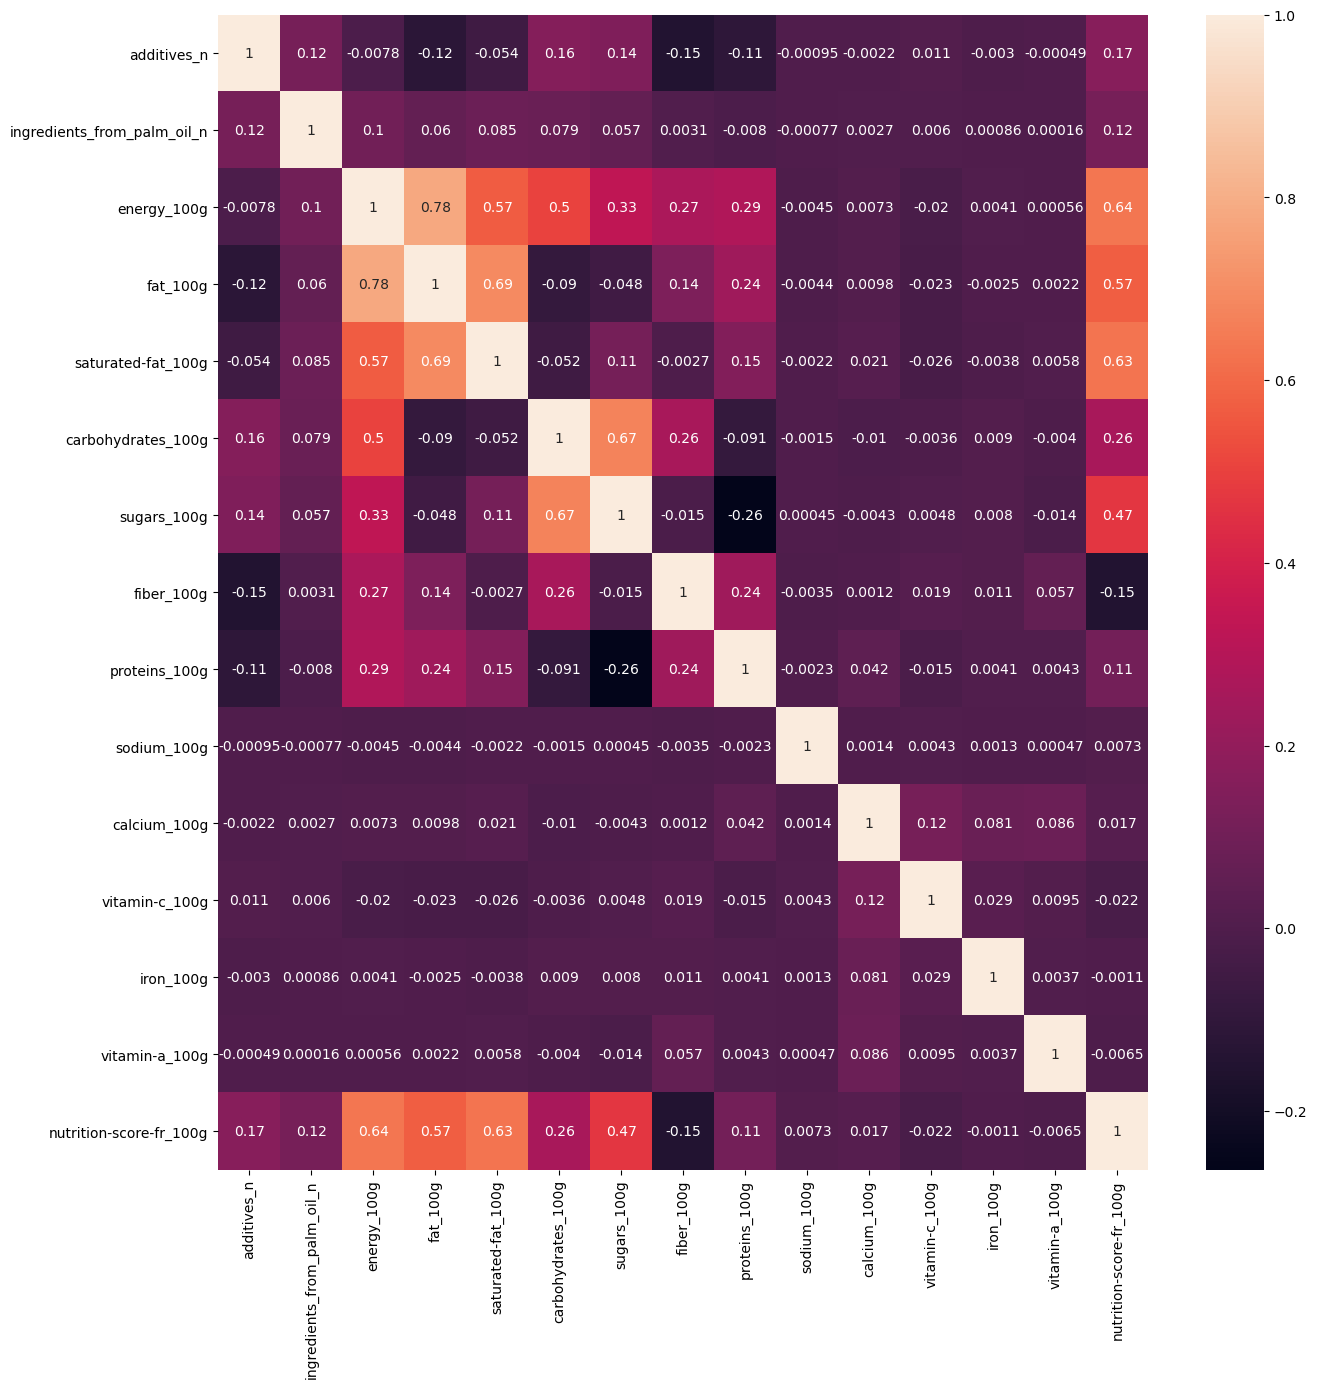

In [30]:
corr = filtered_data.corr()

#specify size of heatmap
fig, ax = plt.subplots(figsize=(15, 15))

#create seaborn heatmap
sns.heatmap(corr,annot=True)

On constate qu'il y a bel et bien des corrélations ou des anti-corrélations entre certaines variables numériques. Cependant il sera plus pertinent d'effectuer une analyse détaillée dans une fois que les données seront nettoyées. On présentera le détail des observations sur le fichier nettoyé dans le notebook 2. 

## (d) Observations où toutes les variables nutritionnelles sont absentes

Durant le travail de nettoyage nous pouvons également constaté des observations où toutes les variables nutritionnelles sont absentes : 

In [31]:
# Filtre qui sélectionne des variables avec toutes les valeurs numériques manquantes
all_null= filtered_data[(filtered_data["energy_100g"].isna())
                            & (filtered_data["proteins_100g"].isna())
                            & (filtered_data["ingredients_from_palm_oil_n"].isna())
                            & (filtered_data["proteins_100g"].isna())
                            & (filtered_data["additives_n"].isna())
                            & (filtered_data["sugars_100g"].isna())
                            & (filtered_data["fat_100g"].isna())
                            & (filtered_data["saturated-fat_100g"].isna())
                            & (filtered_data["carbohydrates_100g"].isna())
                            & (filtered_data["fiber_100g"].isna())
                            & (filtered_data["proteins_100g"].isna())
                            & (filtered_data["vitamin-a_100g"].isna())
                            & (filtered_data["vitamin-c_100g"].isna())
                            & (filtered_data["calcium_100g"].isna())
                            & (filtered_data["iron_100g"].isna())
                            & (filtered_data["nutrition-score-fr_100g"].isna())
                            & (filtered_data["sodium_100g"].isna()) ] 

print(f"Nombre d'observations avec toutes les valeurs numériques manquantes: {all_null.shape[0]}")
print("50 premières valeurs manquantes: ")
display(all_null.head(50))

Nombre d'observations avec toutes les valeurs numériques manquantes: 44533
50 premières valeurs manquantes: 


,code,url,states_fr,created_datetime,last_modified_datetime,creator,product_name,brands,countries_fr,ingredients_text,serving_size,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g,nutrition-score-fr_100g,nutrition_grade_fr
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles à com...",2016-09-17T09:17:46Z,2016-09-17T09:18:13Z,openfoodfacts-contributors,Farine de blé noir,Ferme t'y R'nao,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles à com...",2015-06-17T08:45:04Z,2015-06-17T10:11:54Z,date-limite-app,Filet de bœuf,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles à com...",2016-03-17T18:17:10Z,2016-03-17T18:17:18Z,tacinte,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles à com...",2015-01-25T21:36:13Z,2016-09-10T20:08:02Z,tacinte,Twix x2,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,0000007020254,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles à com...",2015-01-01T22:09:53Z,2015-01-02T14:52:53Z,teolemon,NaN,A&W,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,0000009336247,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles à com...",2016-11-13T09:37:57Z,2016-11-13T09:40:10Z,tacite,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,0000013000004,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles à com...",2017-01-14T22:13:19Z,2017-01-14T22:13:48Z,openfoodfacts-contributors,Kochspeck,Bannholz,Suisse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,0000020004552,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles à com...",2016-09-17T08:09:01Z,2016-09-17T08:09:28Z,agamitsudo,Côte du Rhône village,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217,0000020364373,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles à com...",2014-03-04T22:02:53Z,2014-03-04T22:05:33Z,openfoodfacts-contributors,Zumo de Piña,Vita fit,Espagne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224,0000030053014,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles à com...",2015-04-27T16:51:53Z,2015-04-27T16:51:54Z,date-limite-app,Bonbon Vichy,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Comme toutes les valeurs numériques sont manquantes, nous ne pouvons malheureusement pas effectuer une analyse sur ces produits. On va donc devoir les supprimer par la suite. 

In [32]:
filtered_data.drop(axis=0, index=all_null.index, inplace=True)
filttered_data = filtered_data.reset_index(drop=True)
print(f"Nombre d'observations restantes: {filtered_data.shape[0]}")

Nombre d'observations restantes: 276028


## (e) Observations où toutes les variables minérales sont absentes

In [33]:
minerals_null=filtered_data[(filtered_data["calcium_100g"].isna())
                            & (filtered_data["iron_100g"].isna())
                            & (filtered_data["sodium_100g"].isna())
                             ] 
print(f"Nombre d'observations avec toutes les valeurs de minéraux absentes : {minerals_null.shape[0]}")
print("50 premières valeurs manquantes : ")
display(minerals_null.head(50))

Nombre d'observations avec toutes les valeurs de minéraux absentes : 20208
50 premières valeurs manquantes : 


,code,url,states_fr,created_datetime,last_modified_datetime,creator,product_name,brands,countries_fr,ingredients_text,serving_size,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g,nutrition-score-fr_100g,nutrition_grade_fr
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:34:13Z,2017-03-09T10:34:13Z,usda-ndb-import,Organic Polenta,Bob's Red Mill,États-Unis,Organic polenta,35 g (0.25 cup),0.0,0.0,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0000000016513,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:34:14Z,2017-03-09T10:34:14Z,usda-ndb-import,Organic Sunflower Oil,Napa Valley Naturals,États-Unis,"Organic expeller pressed, refined high oleic s...",14 g (1 Tbsp),0.0,0.0,3586.0,100.00,7.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,0000000018197,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:34:12Z,2017-03-09T10:34:12Z,usda-ndb-import,Lotus Organic Brown Jasmine Rice,Unfi,États-Unis,Organic brown jasmine rice,45 g (0.25 cup),0.0,0.0,1582.0,2.22,NaN,77.78,2.22,2.2,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,0000000018562,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T09:07:42Z,2017-03-09T09:07:42Z,usda-ndb-import,"Sweeteners, Demerara Turbinado Sugar","Wholesome, Wholesome Sweeteners",États-Unis,Raw cane demerara sugar.,4 g (1 tsp),0.0,0.0,1569.0,NaN,NaN,100.00,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,0000000018753,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:35:28Z,2017-03-09T10:35:28Z,usda-ndb-import,Organic Whole Grain Emmer Farro,Bluebird Grain,États-Unis,Bluebird grain organic grain emmer farro,47 g (0.25 cup),0.0,0.0,1515.0,2.13,NaN,72.34,NaN,10.6,12.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,0000000027083,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2016-08-26T15:03:02Z,2016-08-26T15:03:02Z,canieatthis-app,Marks % Spencer 2 Blueberry Muffins,NaN,Royaume-Uni,pasteurized free range egg.sugar.blueberries (...,NaN,6.0,0.0,1513.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,0000000033268,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:34:13Z,2017-03-09T10:34:13Z,usda-ndb-import,"Sweeteners, Organic Fair Trade Sugar","Wholesome, Wholesome Sweeteners",États-Unis,Organic evaporated cane juice.,4 g (1 tsp),0.0,0.0,1569.0,NaN,NaN,100.00,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,0000000034715,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:35:15Z,2017-03-09T10:35:15Z,usda-ndb-import,Organic Pecan Halves,Pcc,États-Unis,Us grown organic pecans.,28.4 g (1 oz),0.0,0.0,2946.0,70.42,7.04,14.08,3.52,7.0,10.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,0000000035071,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-10T09:34:44Z,2017-03-10T09:34:44Z,usda-ndb-import,Organic Extra Virgin Olive Oil,Napa Valley Naturals,États-Unis,100% cold pressed unrefined oil from the first...,14 ml (1 Tbsp),0.0,0.0,3586.0,100.00,14.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,0000000035279,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-10T09:34:45Z,2017-03-10T09:34:46Z,usda-ndb-import,Organic Canola Oil Refined,Spectrum,États-Unis,Organic expeller pressed refined canola oil,14 ml (1 Tbsp),0.0,0.0,3586.0,100.00,7.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Comme on peut le constater, les aliments qui n'ont pas de valeur d'entrée dans la catégorie des minéraux, ne contiennent pas beaucoup de calcium, sodium ou de fer. On pourra par la suite envisager de remplir les valeurs manquantes par des zéros pour ces aliments là.

In [34]:
filtered_data['calcium_100g'] = filtered_data['calcium_100g'].fillna(0)
filtered_data['iron_100g'] = filtered_data['iron_100g'].fillna(0)
filtered_data['sodium_100g'] = filtered_data['sodium_100g'].fillna(0)

## (f) Observations où toutes les variables de fibre sont absentes

In [35]:
fiber_null=filtered_data[(filtered_data["fiber_100g"].isna())
                             ] 
print(f"Nombre d'observations avec toutes les valeurs de fibres absentes : {fiber_null.shape[0]}")
print("50 premières valeurs manquantes: ")
display(fiber_null.head(50))

Nombre d'observations avec toutes les valeurs de fibres absentes : 75282
50 premières valeurs manquantes: 


,code,url,states_fr,created_datetime,last_modified_datetime,creator,product_name,brands,countries_fr,ingredients_text,serving_size,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g,nutrition-score-fr_100g,nutrition_grade_fr
6,0000000016117,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:35:30Z,2017-03-09T10:35:30Z,usda-ndb-import,Organic Long Grain White Rice,Lundberg,États-Unis,Organic long grain white rice,45 g (0.25 cup),0.0,0.0,1490.0,NaN,NaN,80.00,NaN,NaN,8.89,0.000000,0.044,0.0027,0.0000,NaN,NaN,NaN
9,0000000016513,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:34:14Z,2017-03-09T10:34:14Z,usda-ndb-import,Organic Sunflower Oil,Napa Valley Naturals,États-Unis,"Organic expeller pressed, refined high oleic s...",14 g (1 Tbsp),0.0,0.0,3586.0,100.0,7.14,NaN,NaN,NaN,NaN,0.000000,0.000,NaN,0.0000,NaN,NaN,NaN
25,0000000018371,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:35:13Z,2017-03-09T10:35:13Z,usda-ndb-import,Real Salt Granular,Redmond,États-Unis,Ancient sea salt with natural trace minerals,1.4 g (0.25 tsp),0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.857000,0.000,NaN,0.0000,NaN,NaN,NaN
36,0000000018562,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T09:07:42Z,2017-03-09T09:07:42Z,usda-ndb-import,"Sweeteners, Demerara Turbinado Sugar","Wholesome, Wholesome Sweeteners",États-Unis,Raw cane demerara sugar.,4 g (1 tsp),0.0,0.0,1569.0,NaN,NaN,100.00,100.00,NaN,NaN,0.000000,0.000,NaN,0.0000,NaN,NaN,NaN
47,0000000027083,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2016-08-26T15:03:02Z,2016-08-26T15:03:02Z,canieatthis-app,Marks % Spencer 2 Blueberry Muffins,NaN,Royaume-Uni,pasteurized free range egg.sugar.blueberries (...,NaN,6.0,0.0,1513.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000,NaN,0.0000,NaN,NaN,NaN
71,0000000033084,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:35:09Z,2017-03-09T10:35:09Z,usda-ndb-import,Fine Sea Salt,Unfi,États-Unis,New zealand sea salt with natural trace elements.,1.5 g (0.25 tsp),0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.333000,0.000,NaN,0.0000,NaN,NaN,NaN
72,0000000033268,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:34:13Z,2017-03-09T10:34:13Z,usda-ndb-import,"Sweeteners, Organic Fair Trade Sugar","Wholesome, Wholesome Sweeteners",États-Unis,Organic evaporated cane juice.,4 g (1 tsp),0.0,0.0,1569.0,NaN,NaN,100.00,100.00,NaN,NaN,0.000000,0.000,NaN,0.0000,NaN,NaN,NaN
96,0000000035071,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-10T09:34:44Z,2017-03-10T09:34:44Z,usda-ndb-import,Organic Extra Virgin Olive Oil,Napa Valley Naturals,États-Unis,100% cold pressed unrefined oil from the first...,14 ml (1 Tbsp),0.0,0.0,3586.0,100.0,14.29,NaN,NaN,NaN,NaN,0.000000,0.000,NaN,0.0000,NaN,NaN,NaN
97,0000000035170,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-10T09:34:48Z,2017-03-10T09:34:48Z,usda-ndb-import,Liquid Aminos,Bragg,États-Unis,"Water, bragg's formulated soy protein",2.5 ml (0.5 tsp),0.0,0.0,NaN,NaN,NaN,4.00,NaN,NaN,11.60,4.400000,0.000,NaN,0.0000,NaN,NaN,NaN
98,0000000035279,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-10T09:34:45Z,2017-03-10T09:34:46Z,usda-ndb-import,Organic Canola Oil Refined,Spectrum,États-Unis,Organic expeller pressed refined canola oil,14 ml (1 Tbsp),0.0,0.0,3586.0,100.0,7.14,NaN,NaN,NaN,NaN,0.000000,0.0

Comme on peut le constater, les aliments qui n'ont pas de valeur d'entrée dans la catégorie desfibres. On pourra par la suite envisager de remplir les valeurs manquantes par des zéros pour ces aliments là.

In [36]:
filtered_data['fiber_100g'] = filtered_data['fiber_100g'].fillna(0)

## (g) Observations où toutes les variables de vitamines a et c sont absentes

Observons les produits qui ont des données manquantes au niveau des vitamines : 

In [37]:
vitamins_null=filtered_data[(filtered_data["vitamin-a_100g"].isna())
                            & (filtered_data["vitamin-c_100g"].isna())
                            
                       ]
print(f"Nombre d'observations avec les valeurs de vitamines absentes: {vitamins_null.shape[0]}")
print("50 premières valeurs manquantes : ")
display(vitamins_null.head(50))

Nombre d'observations avec les valeurs de vitamines absentes: 132906
50 premières valeurs manquantes : 


,code,url,states_fr,created_datetime,last_modified_datetime,creator,product_name,brands,countries_fr,ingredients_text,serving_size,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g,nutrition-score-fr_100g,nutrition_grade_fr
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:35:31Z,2017-03-09T10:35:31Z,usda-ndb-import,Organic Salted Nut Mix,Grizzlies,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,0.0,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,0.482,0.143,NaN,0.00514,NaN,12.0,d
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:34:13Z,2017-03-09T10:34:13Z,usda-ndb-import,Organic Polenta,Bob's Red Mill,États-Unis,Organic polenta,35 g (0.25 cup),0.0,0.0,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,0.000,0.000,NaN,0.00000,NaN,NaN,NaN
5,0000000016100,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:34:11Z,2017-03-09T10:34:11Z,usda-ndb-import,Breadshop Honey Gone Nuts Granola,Unfi,États-Unis,"Rolled oats, grape concentrate, expeller press...",52 g (0.5 cup),0.0,0.0,1933.0,18.27,1.92,63.46,11.54,7.7,13.46,0.000,0.038,NaN,0.00346,NaN,NaN,NaN
7,0000000016124,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:35:11Z,2017-03-09T10:35:12Z,usda-ndb-import,Organic Muesli,Daddy's Muesli,États-Unis,"Org oats, org hemp granola (org oats, evaporat...",64 g (0.5 cup),2.0,0.0,1833.0,18.75,4.69,57.81,15.62,9.4,14.06,0.055,0.062,NaN,0.00422,NaN,7.0,c
8,0000000016193,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:34:11Z,2017-03-09T10:34:11Z,usda-ndb-import,Organic Dark Chocolate Minis,Equal Exchange,États-Unis,"Organic chocolate liquor, organic raw cane sug...",40 g (40 g),0.0,0.0,2406.0,37.50,22.50,55.00,42.50,7.5,5.00,0.000,0.050,NaN,0.01125,NaN,NaN,NaN
9,0000000016513,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:34:14Z,2017-03-09T10:34:14Z,usda-ndb-import,Organic Sunflower Oil,Napa Valley Naturals,États-Unis,"Organic expeller pressed, refined high oleic s...",14 g (1 Tbsp),0.0,0.0,3586.0,100.00,7.14,NaN,NaN,0.0,NaN,0.000,0.000,NaN,0.00000,NaN,NaN,NaN
10,0000000016612,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:35:31Z,2017-03-09T10:35:31Z,usda-ndb-import,Organic Adzuki Beans,Unfi,États-Unis,Organic adzuki beans,48 g (0.25 cup),0.0,0.0,1393.0,1.04,NaN,62.50,NaN,12.5,22.92,0.000,0.062,NaN,0.00450,NaN,NaN,NaN
12,0000000016872,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:34:10Z,2017-03-09T10:34:11Z,usda-ndb-import,Zen Party Mix,Sunridge,États-Unis,"Roasted peanuts (peanuts, peanut or canola oil...",30 g (0.25 cup),1.0,0.0,2230.0,36.67,5.00,36.67,3.33,6.7,16.67,0.633,0.133,NaN,0.00360,NaN,12.0,d
13,0000000016933,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:34:11Z,2017-03-09T10:34:11Z,usda-ndb-import,Organic Golden Flax Seeds,Unfi,États-Unis,Organic golden flax seeds,21 g (2 Tbsp),0.0,0.0,2590.0,42.86,4.76,38.10,NaN,38.1,19.05,0.038,0.286,NaN,0.01286,NaN,NaN,NaN
14,0000000017497,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:34:38Z,2017-03-09T10:34:38Z,usda-ndb-import,Organic Spicy Punks,Eden,États-Unis,"Organic dry roasted pumpkin seeds, tamari (soy...",33 g (0.25 cup),0.0,0.0,2536.0,48.48,9.09,15.15,NaN,15.2,30.30,0.227,0.000,NaN,0.00545,NaN,NaN,NaN


Il ya beaucoup de valeurs manquantes. Supprimer la colonne ou bien supprimer les produits ne serait pas une solution. Cependant, on peut constater que les produits ne contiennent pas de vitamines ou bien sont des jus de fruits et contiennent de la vitamine c. Nous allons donc rechercher à rechercher le nombre de jus de fruits apparaïssant dans la liste de produits ayant des valeurs manquantes en vitamines : 

In [38]:
# Comptage du nombre d'occcurence où le mot 'jus' apparaït dans la colonne des ingrédients
vit_count=vitamins_null['ingredients_text'].str.contains('jus').sum()
print ("Le nombre de jus présents est de : " + str(vit_count))

Le nombre de jus présents est de : 6656


On va remplir d'abord toutes les valeurs manquantes par un 0 avant de choisir celles contenant le mot 'jus' pour remplacer par la moyenne de vitamine c. 

In [39]:
vitamins_null2=vitamins_null.copy()

# Remplacer avec toutes les valeurs manquantes en vitamines par des zéros
vitamins_null2['vitamin-a_100g'] = vitamins_null2['vitamin-a_100g'].fillna(0)
vitamins_null2['vitamin-c_100g'] = vitamins_null2['vitamin-c_100g'].fillna(0)

In [40]:
# Enlever les valeurs Nan dans la liste des ingrédients
vitamins_null2 = vitamins_null2.dropna(subset=['ingredients_text'])

In [41]:
#Affichage des jus
vitamins_jus = vitamins_null2[vitamins_null2['ingredients_text'].str.contains("jus")]
vitamins_jus.head()

,code,url,states_fr,created_datetime,last_modified_datetime,creator,product_name,brands,countries_fr,ingredients_text,serving_size,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g,nutrition-score-fr_100g,nutrition_grade_fr
301,000051,http://world-fr.openfoodfacts.org/produit/0000...,"A vérifier,Complet,Informations nutritionnelle...",2016-12-01T19:59:24Z,2016-12-01T20:24:57Z,beniben,Fondants Citron,Bijou,France,"Sucre, blanc d’_œufs_ frais, poudre d’_amande_...",22 g,8.0,0.0,1896.0,24.0,10.0,50.0,37.0,2.5,8.1,0.307087,0.0,0.0,0.0,0.0,22.0,e
11336,0014113912112,http://world-fr.openfoodfacts.org/produit/0014...,"A vérifier,Complet,Informations nutritionnelle...",2015-04-14T08:42:18Z,2015-04-14T14:25:27Z,domdom26,Pistachios salt & pepper,Wonderful pistachios,France,"pistaches 96%, sel 2%, poivre, sucre, poudre d...",NaN,0.0,0.0,2444.0,46.0,5.6,17.4,7.8,0.0,21.4,0.984252,0.0,0.0,0.0,0.0,23.0,e
11342,0014113912860,http://world-fr.openfoodfacts.org/produit/0014...,"A vérifier,Complet,Informations nutritionnelle...",2015-06-17T17:45:33Z,2015-08-02T12:50:23Z,domdom26,Pistaches XXL Poivre & Sel,Wonderful,France,"_Pistaches_ (96%), sel (2,5%), poivre (0,5%), ...",NaN,0.0,0.0,2444.0,46.0,5.6,17.4,7.8,0.0,21.4,0.984252,0.0,0.0,0.0,0.0,23.0,e
13083,00161589,http://world-fr.openfoodfacts.org/produit/0016...,"A compléter,Informations nutritionnelles compl...",2017-04-20T16:12:17Z,2017-04-20T16:12:20Z,kiliweb,Wood fired pizza italian cured meats 421g,M&S,France,"pâte à pizza recouverte de sauce tomate, de fr...",NaN,3.0,0.0,1146.0,13.1,4.6,24.8,2.4,1.4,13.4,0.590551,0.0,0.0,0.0,0.0,12.0,d
13117,0016229006143,http://world-fr.openfoodfacts.org/produit/0016...,"A compléter,Informations nutritionnelles à com...",2013-03-22T12:33:18Z,2015-08-09T17:35:32Z,stephane,Boisson à base de jus de mangue,NaN,France,"eau, jus de mangue (25%), sucre, acidifiant (E...",NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.000000,0.0,0.0,0.0,0.0,NaN,NaN


In [42]:
vitamins_jus.shape

(6656, 27)

In [43]:
#Identification du code des éléments contenant 'jus'
code_vitamins=vitamins_jus.set_index('code')
index_vitamins=code_vitamins.index.values
index_vitamins

array(['000051', '0014113912112', '0014113912860', ..., '9501100460073',
       '9556156040182', '96116845'], dtype=object)

In [44]:
#Valeurs de données avec ajout de la moyenne de la vitamine c
filtered_data2=filtered_data.copy()
filtered_data2.loc[filtered_data2['code'].isin(index_vitamins),'vitamin-c_100g']=filtered_data['vitamin-c_100g'].mean()
filtered_data2.head()

,code,url,states_fr,created_datetime,last_modified_datetime,creator,product_name,brands,countries_fr,ingredients_text,serving_size,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g,nutrition-score-fr_100g,nutrition_grade_fr
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,usda-ndb-import,Banana Chips Sweetened (Whole),NaN,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,0.0,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.000,0.000,0.0214,0.00129,0.0,14.0,d
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,usda-ndb-import,Peanuts,Torn & Glasser,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,0.0,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.250,0.071,0.0000,0.00129,0.0,0.0,b
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:35:31Z,2017-03-09T10:35:31Z,usda-ndb-import,Organic Salted Nut Mix,Grizzlies,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,0.0,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,0.482,0.143,NaN,0.00514,NaN,12.0,d
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:34:13Z,2017-03-09T10:34:13Z,usda-ndb-import,Organic Polenta,Bob's Red Mill,États-Unis,Organic polenta,35 g (0.25 cup),0.0,0.0,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,0.000,0.000,NaN,0.00000,NaN,NaN,NaN
5,0000000016100,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:34:11Z,2017-03-09T10:34:11Z,usda-ndb-import,Breadshop Honey Gone Nuts Granola,Unfi,États-Unis,"Rolled oats, grape concentrate, expeller press...",52 g (0.5 cup),0.0,0.0,1933.0,18.27,1.92,63.46,11.54,7.7,13.46,0.000,0.038,NaN,0.00346,NaN,NaN,NaN


In [45]:
# Ajout des 0 pour les autres données 
filtered_data2['vitamin-a_100g'] = filtered_data2['vitamin-a_100g'].fillna(0)
filtered_data2['vitamin-c_100g'] = filtered_data2['vitamin-c_100g'].fillna(0)

In [46]:
# Remettre les  indices avec df.reset_index()
filtered_data2 = filtered_data2.reset_index(drop=True)
filtered_data2.head()

,code,url,states_fr,created_datetime,last_modified_datetime,creator,product_name,brands,countries_fr,ingredients_text,serving_size,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g,nutrition-score-fr_100g,nutrition_grade_fr
0,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,usda-ndb-import,Banana Chips Sweetened (Whole),NaN,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,0.0,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.000,0.000,0.0214,0.00129,0.0,14.0,d
1,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,usda-ndb-import,Peanuts,Torn & Glasser,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,0.0,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.250,0.071,0.0000,0.00129,0.0,0.0,b
2,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:35:31Z,2017-03-09T10:35:31Z,usda-ndb-import,Organic Salted Nut Mix,Grizzlies,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,0.0,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,0.482,0.143,0.0000,0.00514,0.0,12.0,d
3,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:34:13Z,2017-03-09T10:34:13Z,usda-ndb-import,Organic Polenta,Bob's Red Mill,États-Unis,Organic polenta,35 g (0.25 cup),0.0,0.0,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,0.000,0.000,0.0000,0.00000,0.0,NaN,NaN
4,0000000016100,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:34:11Z,2017-03-09T10:34:11Z,usda-ndb-import,Breadshop Honey Gone Nuts Granola,Unfi,États-Unis,"Rolled oats, grape concentrate, expeller press...",52 g (0.5 cup),0.0,0.0,1933.0,18.27,1.92,63.46,11.54,7.7,13.46,0.000,0.038,0.0000,0.00346,0.0,NaN,NaN


In [47]:
filtered_data2.shape

(276028, 27)

In [48]:
missing(filtered_data2)

,Pourcentage Valeurs Manquantes,Nombre de valeurs manquantes
serving_size,23.60,65135
nutrition_grade_fr,19.91,54962
nutrition-score-fr_100g,19.91,54962
saturated-fat_100g,16.90,46637
carbohydrates_100g,11.79,32555
fat_100g,11.68,32248
sugars_100g,11.31,31224
additives_n,9.85,27194
ingredients_from_palm_oil_n,9.85,27194
ingredients_text,9.85,27193


## (h) Observations où toutes les variables de graisse alimentaire sont absentes

In [49]:
fat_null=filtered_data2[(filtered_data2["fat_100g"].isna())
                       | (filtered_data2["saturated-fat_100g"].isna())
                             ] 
print(f"Nombre d'observations avec toutes les valeurs de graisse alimentaire absentes : {fat_null.shape[0]}")
print("50 premières valeurs manquantes: ")
display(fat_null.head(50))

Nombre d'observations avec toutes les valeurs de graisse alimentaire absentes : 63911
50 premières valeurs manquantes: 


,code,url,states_fr,created_datetime,last_modified_datetime,creator,product_name,brands,countries_fr,ingredients_text,serving_size,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g,nutrition-score-fr_100g,nutrition_grade_fr
3,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:34:13Z,2017-03-09T10:34:13Z,usda-ndb-import,Organic Polenta,Bob's Red Mill,États-Unis,Organic polenta,35 g (0.25 cup),0.0,0.0,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,0.000,0.000,0.0000,0.00000,0.000000,NaN,NaN
5,0000000016117,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:35:30Z,2017-03-09T10:35:30Z,usda-ndb-import,Organic Long Grain White Rice,Lundberg,États-Unis,Organic long grain white rice,45 g (0.25 cup),0.0,0.0,1490.0,NaN,NaN,80.00,NaN,0.0,8.89,0.000,0.044,0.0027,0.00000,0.000000,NaN,NaN
9,0000000016612,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:35:31Z,2017-03-09T10:35:31Z,usda-ndb-import,Organic Adzuki Beans,Unfi,États-Unis,Organic adzuki beans,48 g (0.25 cup),0.0,0.0,1393.0,1.04,NaN,62.50,NaN,12.5,22.92,0.000,0.062,0.0000,0.00450,0.000000,NaN,NaN
10,0000000016650,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:34:28Z,2017-03-09T10:34:28Z,usda-ndb-import,Organic Penne Pasta,Gardentime,États-Unis,Organic refined durum semolina wheat flour,57 g (0.5 cup),0.0,0.0,1540.0,1.75,NaN,73.68,NaN,1.8,14.04,0.000,0.000,0.0042,0.00126,0.000000,NaN,NaN
17,0000000018197,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:34:12Z,2017-03-09T10:34:12Z,usda-ndb-import,Lotus Organic Brown Jasmine Rice,Unfi,États-Unis,Organic brown jasmine rice,45 g (0.25 cup),0.0,0.0,1582.0,2.22,NaN,77.78,2.22,2.2,8.89,0.000,0.000,0.0000,0.00000,0.000000,NaN,NaN
24,0000000018371,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:35:13Z,2017-03-09T10:35:13Z,usda-ndb-import,Real Salt Granular,Redmond,États-Unis,Ancient sea salt with natural trace minerals,1.4 g (0.25 tsp),0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,37.857,0.000,0.0000,0.00000,0.000000,NaN,NaN
30,0000000018456,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:35:18Z,2017-03-09T10:35:18Z,usda-ndb-import,Organic Red Quinoa,Pcc,États-Unis,Organic red quinoa,45 g (0.25 cup),0.0,0.0,1490.0,6.67,NaN,64.44,11.11,8.9,13.33,0.004,0.044,0.0000,0.00520,0.000000,NaN,NaN
35,0000000018562,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T09:07:42Z,2017-03-09T09:07:42Z,usda-ndb-import,"Sweeteners, Demerara Turbinado Sugar","Wholesome, Wholesome Sweeteners",États-Unis,Raw cane demerara sugar.,4 g (1 tsp),0.0,0.0,1569.0,NaN,NaN,100.00,100.00,0.0,NaN,0.000,0.000,0.0000,0.00000,0.000000,NaN,NaN
38,0000000018708,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:34:27Z,2017-03-09T10:34:27Z,usda-ndb-import,Organic Black Beans,Unfi,États-Unis,Organic black beans,45 g (0.25 cup),0.0,0.0,1393.0,NaN,NaN,62.22,2.22,24.4,22.22,0.000,0.178,0.0000,0.00800,0.000000,NaN,NaN
39,0000000018753,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:35:28Z,2017-03-09T10:35:28Z,usda-ndb-import,Organic Whole Grain Emmer Farro,Bluebird Grain,États-Unis,Bluebird grain organic grain emmer farro,47 g (0.25 cup),0.0,0.0,1515.0,2.13,NaN,72.34,NaN,10.6,12.77,0.000,0.000,0.0000,0.00000,0.000000,NaN,NaN


On remarque que ces aliments ne contiennent pas de gras en principe. On va donc remplir ces valeurs manquantes par 0. 

In [50]:
# Remplacer avec toutes les valeurs manquantes  par des zéros
filtered_data2['fat_100g'] = filtered_data2['fat_100g'].fillna(0)
filtered_data2['saturated-fat_100g'] = filtered_data2['saturated-fat_100g'].fillna(0)

In [51]:
missing(filtered_data2)

,Pourcentage Valeurs Manquantes,Nombre de valeurs manquantes
serving_size,23.60,65135
nutrition_grade_fr,19.91,54962
nutrition-score-fr_100g,19.91,54962
carbohydrates_100g,11.79,32555
sugars_100g,11.31,31224
ingredients_text,9.85,27193
ingredients_from_palm_oil_n,9.85,27194
additives_n,9.85,27194
proteins_100g,5.91,16303
energy_100g,5.47,15103


In [52]:
filtered_data=filtered_data2

# 7. Remplissage par 'Unknown' pour les variables descriptives

In [53]:
filtered_data['states_fr'] = filtered_data['states_fr'].fillna('Unknown')
filtered_data['countries_fr'] = filtered_data['countries_fr'].fillna('Unknown')
filtered_data['product_name'] = filtered_data['product_name'].fillna('Unknown')
filtered_data['brands'] = filtered_data['brands'].fillna('Unknown')
filtered_data['ingredients_from_palm_oil_n'] = filtered_data['ingredients_from_palm_oil_n'].fillna('Unknown')
filtered_data['ingredients_text'] = filtered_data['ingredients_text'].fillna('Unknown')
filtered_data['code'] = filtered_data['code'].fillna('Unknown')
filtered_data['url'] = filtered_data['url'].fillna('Unknown')
filtered_data['created_datetime'] = filtered_data['created_datetime'].fillna('Unknown')
filtered_data['creator'] = filtered_data['creator'].fillna('Unknown')
filtered_data['serving_size'] = filtered_data['serving_size'].fillna('Unknown')

In [54]:
missing(filtered_data)

,Pourcentage Valeurs Manquantes,Nombre de valeurs manquantes
nutrition_grade_fr,19.91,54962
nutrition-score-fr_100g,19.91,54962
carbohydrates_100g,11.79,32555
sugars_100g,11.31,31224
additives_n,9.85,27194
proteins_100g,5.91,16303
energy_100g,5.47,15103
brands,0.00,0
countries_fr,0.00,0
states_fr,0.00,0


# 8. Remplissage par IterativeImputer

On envisagera cette méthode pour remplacer les valeurs manquantes des autres variables numériques car elles peuvent être corrélées. Selon la heatmap de corrélation, on constate que les variables carbohydrates_100g, sugars_100g et nutriscore_100g sont fortement corrélés. On peut utiliser cet algorithme. Comme il y a pas beaucoup de données manquantes pour les autres variables numériques, on peut également remplir ces variables en utilisant cette méthode qui fabrique des clusters.  

In [55]:
#Set of data with values only
data_values=filtered_data.copy()

In [56]:
data_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276028 entries, 0 to 276027
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         276028 non-null  object 
 1   url                          276028 non-null  object 
 2   states_fr                    276028 non-null  object 
 3   created_datetime             276028 non-null  object 
 4   last_modified_datetime       276028 non-null  object 
 5   creator                      276028 non-null  object 
 6   product_name                 276028 non-null  object 
 7   brands                       276028 non-null  object 
 8   countries_fr                 276028 non-null  object 
 9   ingredients_text             276028 non-null  object 
 10  serving_size                 276028 non-null  object 
 11  additives_n                  248834 non-null  float64
 12  ingredients_from_palm_oil_n  276028 non-null  object 
 13 

In [57]:
data_values = data_values.set_index('code')
data_values.head()

,url,states_fr,created_datetime,last_modified_datetime,creator,product_name,brands,countries_fr,ingredients_text,serving_size,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g,nutrition-score-fr_100g,nutrition_grade_fr
code,,,,,,,,,,,,,,,,,,,,,,,,,,
0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,usda-ndb-import,Banana Chips Sweetened (Whole),Unknown,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,0,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.000,0.000,0.0214,0.00129,0.0,14.0,d
0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,usda-ndb-import,Peanuts,Torn & Glasser,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,0,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.250,0.071,0.0000,0.00129,0.0,0.0,b
0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:35:31Z,2017-03-09T10:35:31Z,usda-ndb-import,Organic Salted Nut Mix,Grizzlies,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,0,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,0.482,0.143,0.0000,0.00514,0.0,12.0,d
0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:34:13Z,2017-03-09T10:34:13Z,usda-ndb-import,Organic Polenta,Bob's Red Mill,États-Unis,Organic polenta,35 g (0.25 cup),0.0,0,1552.0,1.43,0.00,77.14,NaN,5.7,8.57,0.000,0.000,0.0000,0.00000,0.0,NaN,NaN
0000000016100,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:34:11Z,2017-03-09T10:34:11Z,usda-ndb-import,Breadshop Honey Gone Nuts Granola,Unfi,États-Unis,"Rolled oats, grape concentrate, expeller press...",52 g (0.5 cup),0.0,0,1933.0,18.27,1.92,63.46,11.54,7.7,13.46,0.000,0.038,0.0000,0.00346,0.0,NaN,NaN


In [58]:
data_values = data_values.select_dtypes(exclude=['object'])
data_values.head()

,additives_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g,nutrition-score-fr_100g
code,,,,,,,,,,,,,,
0000000004530,0.0,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.000,0.000,0.0214,0.00129,0.0,14.0
0000000004559,0.0,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.250,0.071,0.0000,0.00129,0.0,0.0
0000000016087,0.0,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,0.482,0.143,0.0000,0.00514,0.0,12.0
0000000016094,0.0,1552.0,1.43,0.00,77.14,NaN,5.7,8.57,0.000,0.000,0.0000,0.00000,0.0,NaN
0000000016100,0.0,1933.0,18.27,1.92,63.46,11.54,7.7,13.46,0.000,0.038,0.0000,0.00346,0.0,NaN


On utlisera cette méthode pour remplir toutes les variables numériques des nutriments mais pas celle du nutriscore. 
La valeur du nutriscore peut être calculée à partir des nutriments (cf. partie 9). 

In [59]:
data_values2=data_values.drop(columns=['nutrition-score-fr_100g'])
data_values2.head()

,additives_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g
code,,,,,,,,,,,,,
0000000004530,0.0,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.000,0.000,0.0214,0.00129,0.0
0000000004559,0.0,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.250,0.071,0.0000,0.00129,0.0
0000000016087,0.0,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,0.482,0.143,0.0000,0.00514,0.0
0000000016094,0.0,1552.0,1.43,0.00,77.14,NaN,5.7,8.57,0.000,0.000,0.0000,0.00000,0.0
0000000016100,0.0,1933.0,18.27,1.92,63.46,11.54,7.7,13.46,0.000,0.038,0.0000,0.00346,0.0


In [60]:
#Importation des librairies
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Imputation par la moyenne dans un cluster
imp_mean = IterativeImputer(random_state=0,max_iter=1000)
imp_mean.fit(data_values2)
arr = imp_mean.transform(data_values2)

In [61]:
data_values2 = pd.DataFrame(arr, columns = data_values2.columns, index = data_values2.index)
data_values2 = data_values2.round(decimals = 0)
data_values2 = data_values2.astype(int)
data_values2.head()

,additives_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g
code,,,,,,,,,,,,,
0000000004530,0,2243,29,29,64,14,4,4,0,0,0,0,0
0000000004559,0,1941,18,0,61,18,7,18,0,0,0,0,0
0000000016087,0,2540,57,5,18,4,7,18,0,0,0,0,0
0000000016094,0,1552,1,0,77,30,6,9,0,0,0,0,0
0000000016100,0,1933,18,2,63,12,8,13,0,0,0,0,0


In [62]:
missing(data_values2)

,Pourcentage Valeurs Manquantes,Nombre de valeurs manquantes
additives_n,0.0,0
energy_100g,0.0,0
fat_100g,0.0,0
saturated-fat_100g,0.0,0
carbohydrates_100g,0.0,0
sugars_100g,0.0,0
fiber_100g,0.0,0
proteins_100g,0.0,0
sodium_100g,0.0,0
calcium_100g,0.0,0


Toutes les variables numériques ont maintenant une valeur attribuée. 

# 9. Calcul du nutriscore et du nutrigrade

D'après le site de Santé Publique France, il est possible de calculer le nutriscore d'un produit avec la formule suivante : 
$$ Points N - Points P $$

Les points N sont calculables en utilisant le tableau suivant : 

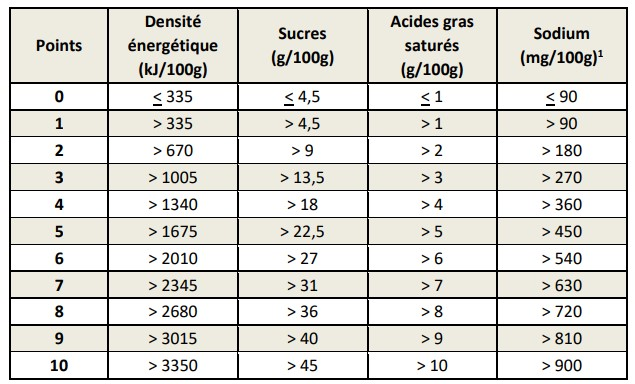

Les points P sont calculables en utilisant le tableau suivant : 



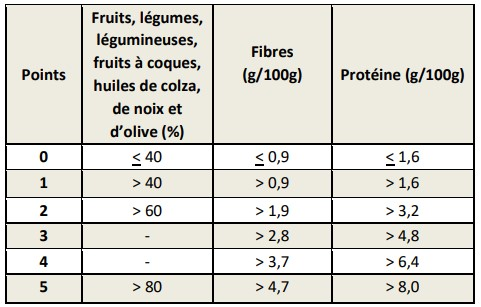


On utilisera les valeurs de vitamines C et vitamines A additionnée pour la colonne fruits et huile de colza. 

Cette formule reste très générale mais elle va nous permettre de calculer un nutriscore et imputer les valeurs manquantes du nutriscore. 

In [63]:
#Ajout de la colonne de nutriscore aux données calculées 
data_values_score=pd.merge(data_values2, data_values['nutrition-score-fr_100g'], how = 'left', on ='code')
data_values_score.head()

,additives_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g,nutrition-score-fr_100g
code,,,,,,,,,,,,,,
0000000004530,0,2243,29,29,64,14,4,4,0,0,0,0,0,14.0
0000000004559,0,1941,18,0,61,18,7,18,0,0,0,0,0,0.0
0000000016087,0,2540,57,5,18,4,7,18,0,0,0,0,0,12.0
0000000016094,0,1552,1,0,77,30,6,9,0,0,0,0,0,NaN
0000000016100,0,1933,18,2,63,12,8,13,0,0,0,0,0,NaN


In [64]:
#Fabriquer un tableau avec aucune valeur manquante
score_train= data_values_score[data_values_score['nutrition-score-fr_100g'].notnull()]
#Fabriquer un tableau avec uniquement les valeurs manquantes
score_test=data_values_score[data_values_score['nutrition-score-fr_100g'].isnull()]
score_test.head()

,additives_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g,nutrition-score-fr_100g
code,,,,,,,,,,,,,,
0000000016094,0,1552,1,0,77,30,6,9,0,0,0,0,0,NaN
0000000016100,0,1933,18,2,63,12,8,13,0,0,0,0,0,NaN
0000000016117,0,1490,0,0,80,36,0,9,0,0,0,0,0,NaN
0000000016193,0,2406,38,22,55,42,8,5,0,0,0,0,0,NaN
0000000016513,0,3586,100,7,-11,1,0,12,0,0,0,0,0,NaN


### Calcul des points N et P

#### Fonctions pour calculer les scores N et P des différents nutriments : 

In [65]:
def calcul_n_energy(kJ):
    if kJ <= 335:
        return 0
    if kJ > 335 and kJ <= 670:
        return 1
    if kJ > 670 and kJ <= 1005:
        return 2
    if kJ > 1005 and kJ <= 1340:
        return 3
    if kJ > 1340 and kJ <= 1675:
        return 4
    if kJ > 1675 and kJ <= 2010:
        return 5
    if kJ > 2010 and kJ <= 2345:
        return 6
    if kJ > 2345 and kJ <= 2680:
        return 7
    if kJ > 2680 and kJ <= 3015:
        return 8
    if kJ > 3015 and kJ <= 3350:
        return 9
    if kJ > 3350:
        return 10

def calcul_n_sugar(g):
    if g <= 4.5:
        return 0
    if g > 4.5 and g <= 9:
        return 1
    if g > 9 and g <= 13.5:
        return 2
    if g > 13.5 and g <= 18:
        return 3
    if g > 18 and g <= 22.5:
        return 4
    if g > 22.5 and g <= 27:
        return 5
    if g > 27 and g <= 31:
        return 6
    if g > 31 and g <= 36:
        return 7
    if g > 36 and g <= 40:
        return 8
    if g > 40 and g <= 45:
        return 9
    if g > 45:
        return 10
    
def calcul_n_ag(g): # acides gras saturés
    if g <= 1:
        return 0
    if g > 1 and g <=2:
        return 1
    if g > 2 and g <= 3:
        return 2
    if g > 3 and g <= 4:
        return 3
    if g > 4 and g <= 5:
        return 4
    if g > 5 and g <=6:
        return 5
    if g > 6 and g <= 7:
        return 6
    if g > 7 and g <= 8:
        return 7
    if g > 8 and g <=9:
        return 8
    if g > 9 and g <= 10:
        return 9
    if g > 10:
        return 10

def calcul_n_sodium(mg):
    if mg <= 90:
        return 0
    if mg > 90 and mg <= 180:
        return 1
    if mg > 180 and mg <= 270:
        return 2
    if mg > 270 and mg <= 360:
        return 3
    if mg > 360 and mg <= 450:
        return 4
    if mg > 450 and mg <= 540:
        return 5
    if mg > 540 and mg <= 630:
        return 6
    if mg > 630 and mg <= 720:
        return 7
    if mg > 720 and mg <= 810:
        return 8
    if mg > 810 and mg <= 900:
        return 9
    if mg > 900:
        return 10


In [66]:
def calcul_p_vit_a(g):
    if g <= 40:
        return 0
    if g > 40 and g <= 60:
        return 1
    if g > 60 and g <= 80:
        return 2
    if g > 80:
        return 5
    
def calcul_p_vit_c(g):
    if g <= 40:
        return 0
    if g > 40 and g <= 60:
        return 1
    if g > 60 and g <= 80:
        return 2
    if g > 80:
        return 5
    
def calcul_p_fibre(g): 
    if g <= 0.9:
        return 0
    if g > 0.9 and g <=1.9:
        return 1
    if g > 1.9 and g <= 2.8:
        return 2
    if g > 2.8 and g <= 3.7:
        return 3
    if g > 3.7 and g <= 4.7 :
        return 4
    if g > 4.7:
        return 5
    
def calcul_p_protein(g): 
    if g <= 1.6:
        return 0
    if g > 1.6 and g <=3.2:
        return 1
    if g > 3.2 and g <= 4.8:
        return 2
    if g > 4.8 and g <= 6.4:
        return 3
    if g > 6.4 and g <= 8.0 :
        return 4
    if g > 8.0:
        return 5

In [67]:


for i in range(score_test.shape[0]):
    # Calcul des points pour la variable energy_100g
    n_energy = calcul_n_energy(score_test["energy_100g"][i])
    
    # Calcul des points pour la variable sugars_100g
    n_sucre = calcul_n_sugar(score_test["sugars_100g"][i])
    
    # Calcul des points pour la variable saturated-fat_100g
    n_ag=calcul_n_ag(score_test["saturated-fat_100g"][i])
    
    # Calcul des points pour la variable sodium_100g
    n_sodium=calcul_n_sodium(score_test["sodium_100g"][i])
    
    # Calcul des points pour vitamin-a_100g
    p_vit_a=calcul_p_vit_a(score_test["vitamin-a_100g"][i])

    # Calcul des points pour vitamin-c_100g
    p_vit_c=calcul_p_vit_c(score_test["vitamin-c_100g"][i])

    # Calcul des points pour fiber_100g
    p_fibre=calcul_p_fibre(score_test["fiber_100g"][i])

    # Calcul des points pour proteins_100g
    p_proteins=calcul_p_protein(score_test["proteins_100g"][i])
    
    #Somme de n et de p
    n = n_energy + n_ag + n_sucre + n_sodium
    p = p_vit_a + p_vit_c + p_fibre + p_proteins
    
    #Remplissage des valeurs NaN
    if np.isnan(score_test["nutrition-score-fr_100g"][i]):
        score_test["nutrition-score-fr_100g"][i] = n - p
  

C:\Users\kherm\AppData\Local\Temp\ipykernel_27160\511691107.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_test["nutrition-score-fr_100g"][i] = n - p
C:\Users\kherm\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [68]:
score_test.head()

,additives_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g,nutrition-score-fr_100g
code,,,,,,,,,,,,,,
0000000016094,0,1552,1,0,77,30,6,9,0,0,0,0,0,0.0
0000000016100,0,1933,18,2,63,12,8,13,0,0,0,0,0,-2.0
0000000016117,0,1490,0,0,80,36,0,9,0,0,0,0,0,6.0
0000000016193,0,2406,38,22,55,42,8,5,0,0,0,0,0,18.0
0000000016513,0,3586,100,7,-11,1,0,12,0,0,0,0,0,11.0


Maintenant qu'on a calculé les valeurs de nutriscore, on va fusionner de nouveau le tableau. 

In [69]:
data_final_values= pd.concat([score_train, score_test], sort=False).sort_index()
data_final_values.shape

(276028, 14)

In [70]:
data_final_values.head()

,additives_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g,nutrition-score-fr_100g
code,,,,,,,,,,,,,,
0000000004530,0,2243,29,29,64,14,4,4,0,0,0,0,0,14.0
0000000004559,0,1941,18,0,61,18,7,18,0,0,0,0,0,0.0
0000000016087,0,2540,57,5,18,4,7,18,0,0,0,0,0,12.0
0000000016094,0,1552,1,0,77,30,6,9,0,0,0,0,0,0.0
0000000016100,0,1933,18,2,63,12,8,13,0,0,0,0,0,-2.0


### Sauvegarde temporaire des valeurs numeriques

In [166]:
data_final_values.to_csv('data_values_project_3.csv',index=True)

## Calcul du nutrigrade

Dans les variables descriptives, il reste plus que le nutrigrade à remplir. 

In [71]:
#Données avec variables descriptives
quality_data=filtered_data.copy()
quality_data= quality_data.set_index('code')
quality_data=quality_data.select_dtypes(exclude=['int32','float64'])
quality_data.head()

,url,states_fr,created_datetime,last_modified_datetime,creator,product_name,brands,countries_fr,ingredients_text,serving_size,ingredients_from_palm_oil_n,nutrition_grade_fr
code,,,,,,,,,,,,
0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,usda-ndb-import,Banana Chips Sweetened (Whole),Unknown,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0,d
0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,usda-ndb-import,Peanuts,Torn & Glasser,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0,b
0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:35:31Z,2017-03-09T10:35:31Z,usda-ndb-import,Organic Salted Nut Mix,Grizzlies,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0,d
0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:34:13Z,2017-03-09T10:34:13Z,usda-ndb-import,Organic Polenta,Bob's Red Mill,États-Unis,Organic polenta,35 g (0.25 cup),0,NaN
0000000016100,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:34:11Z,2017-03-09T10:34:11Z,usda-ndb-import,Breadshop Honey Gone Nuts Granola,Unfi,États-Unis,"Rolled oats, grape concentrate, expeller press...",52 g (0.5 cup),0,NaN


In [72]:
data_values_bis=data_final_values.copy()
data_values_nutrigrade=pd.merge(data_values_bis,quality_data['nutrition_grade_fr'], how = 'left', on ='code')
data_values_nutrigrade.head()

,additives_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g,nutrition-score-fr_100g,nutrition_grade_fr
code,,,,,,,,,,,,,,,
0000000004530,0,2243,29,29,64,14,4,4,0,0,0,0,0,14.0,d
0000000004559,0,1941,18,0,61,18,7,18,0,0,0,0,0,0.0,b
0000000016087,0,2540,57,5,18,4,7,18,0,0,0,0,0,12.0,d
0000000016094,0,1552,1,0,77,30,6,9,0,0,0,0,0,0.0,NaN
0000000016100,0,1933,18,2,63,12,8,13,0,0,0,0,0,-2.0,NaN


#### Fonction pour calculer le nutrigrade

In [73]:
def calcul_nutrigrade(g): 
    if g <= -1:
        return 'a'
    if g > -1 and g <=2:
        return 'b'
    if g > 2 and g <= 10:
        return 'c'
    if g > 10 and g <= 18:
        return 'd'
    if g > 18: 
        return 'e'    

In [74]:
str(data_values_nutrigrade["nutrition_grade_fr"][3])=="nan"

True

In [75]:
for i in range(data_values_nutrigrade.shape[0]):
    
    # Condition de calcul du nutrigrade
    if str(data_values_nutrigrade["nutrition_grade_fr"][i])=="nan" :

    # Calcul du nutrigrade
        data_values_nutrigrade["nutrition_grade_fr"][i]= calcul_nutrigrade(data_values_nutrigrade["nutrition-score-fr_100g"][i])


C:\Users\kherm\AppData\Local\Temp\ipykernel_27160\1070821089.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_values_nutrigrade["nutrition_grade_fr"][i]= calcul_nutrigrade(data_values_nutrigrade["nutrition-score-fr_100g"][i])


In [76]:
data_values_nutrigrade.head()

,additives_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g,nutrition-score-fr_100g,nutrition_grade_fr
code,,,,,,,,,,,,,,,
0000000004530,0,2243,29,29,64,14,4,4,0,0,0,0,0,14.0,d
0000000004559,0,1941,18,0,61,18,7,18,0,0,0,0,0,0.0,b
0000000016087,0,2540,57,5,18,4,7,18,0,0,0,0,0,12.0,d
0000000016094,0,1552,1,0,77,30,6,9,0,0,0,0,0,0.0,b
0000000016100,0,1933,18,2,63,12,8,13,0,0,0,0,0,-2.0,a


In [77]:
missing(data_values_nutrigrade)

,Pourcentage Valeurs Manquantes,Nombre de valeurs manquantes
additives_n,0.0,0
energy_100g,0.0,0
fat_100g,0.0,0
saturated-fat_100g,0.0,0
carbohydrates_100g,0.0,0
sugars_100g,0.0,0
fiber_100g,0.0,0
proteins_100g,0.0,0
sodium_100g,0.0,0
calcium_100g,0.0,0


Il n'y a plus de valeurs numériques manquantes. On va maintenant créer le fichier final pour exporter dans le notebook d'analyse. 

# 10. Fichier nettoyé

In [78]:
data_values_final2=data_values_nutrigrade.copy()
quality_data2=quality_data.drop(columns='nutrition_grade_fr')
data_final=pd.merge(quality_data2,data_values_final2, how = 'left', on ='code', sort=False).sort_index()
data_final.head()

,url,states_fr,created_datetime,last_modified_datetime,creator,product_name,brands,countries_fr,ingredients_text,serving_size,ingredients_from_palm_oil_n,additives_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g,nutrition-score-fr_100g,nutrition_grade_fr
code,,,,,,,,,,,,,,,,,,,,,,,,,,
0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,usda-ndb-import,Banana Chips Sweetened (Whole),Unknown,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0,0,2243,29,29,64,14,4,4,0,0,0,0,0,14.0,d
0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,usda-ndb-import,Peanuts,Torn & Glasser,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0,0,1941,18,0,61,18,7,18,0,0,0,0,0,0.0,b
0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:35:31Z,2017-03-09T10:35:31Z,usda-ndb-import,Organic Salted Nut Mix,Grizzlies,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0,0,2540,57,5,18,4,7,18,0,0,0,0,0,12.0,d
0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:34:13Z,2017-03-09T10:34:13Z,usda-ndb-import,Organic Polenta,Bob's Red Mill,États-Unis,Organic polenta,35 g (0.25 cup),0,0,1552,1,0,77,30,6,9,0,0,0,0,0,0.0,b
0000000016100,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:34:11Z,2017-03-09T10:34:11Z,usda-ndb-import,Breadshop Honey Gone Nuts Granola,Unfi,États-Unis,"Rolled oats, grape concentrate, expeller press...",52 g (0.5 cup),0,0,1933,18,2,63,12,8,13,0,0,0,0,0,-2.0,a


In [79]:
data_final.shape

(276028, 26)

In [80]:
missing(data_final)

,Pourcentage Valeurs Manquantes,Nombre de valeurs manquantes
url,0.0,0
states_fr,0.0,0
nutrition-score-fr_100g,0.0,0
vitamin-a_100g,0.0,0
iron_100g,0.0,0
vitamin-c_100g,0.0,0
calcium_100g,0.0,0
sodium_100g,0.0,0
proteins_100g,0.0,0
fiber_100g,0.0,0


### Nettoyage final 

In [81]:
data_final.describe().T

,count,mean,std,min,25%,50%,75%,max
additives_n,276028.0,1.972611,2.393091,-10.0,0.0,1.0,3.0,31.0
energy_100g,276028.0,1097.039293,784.024085,-551.0,407.0,1040.0,1644.0,3887.0
fat_100g,276028.0,11.225959,16.932937,0.0,0.0,3.0,18.0,100.0
saturated-fat_100g,276028.0,4.246638,7.461680,0.0,0.0,1.0,6.0,100.0
carbohydrates_100g,276028.0,33.282279,29.704470,-210.0,7.0,25.0,58.0,194.0
sugars_100g,276028.0,15.544981,20.264484,-72.0,2.0,7.0,22.0,100.0
fiber_100g,276028.0,2.064515,4.119055,-7.0,0.0,0.0,3.0,100.0
proteins_100g,276028.0,6.951451,7.942124,-65.0,1.0,5.0,10.0,100.0
sodium_100g,276028.0,0.685786,48.588130,0.0,0.0,0.0,1.0,25320.0
calcium_100g,276028.0,0.040692,2.375333,0.0,0.0,0.0,0.0,695.0


On constate qu'il y a certaines valeurs imputées par l'Iterative imputer qui sont négatives. On va les observer plus précisément pour remplacer par des valeurs plus représentatives des données . 

### (a) Additifs 

In [82]:
data_final[data_final['additives_n']<0].shape

(113, 26)

In [83]:
pd.set_option('display.max_columns', None)
data_final[data_final['additives_n']<0].head(50)

,url,states_fr,created_datetime,last_modified_datetime,creator,product_name,brands,countries_fr,ingredients_text,serving_size,ingredients_from_palm_oil_n,additives_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g,nutrition-score-fr_100g,nutrition_grade_fr
code,,,,,,,,,,,,,,,,,,,,,,,,,,
0016000275058,http://world-fr.openfoodfacts.org/produit/0016...,"A compléter,Informations nutritionnelles compl...",2014-05-06T17:31:59Z,2015-08-09T17:36:24Z,openfoodfacts-contributors,Fiber One Original,General Mills,États-Unis,Unknown,1/2 cup (30 g),Unknown,-2,837,3,0,83,0,47,7,0,0,0,0,0,-3.0,a
0068505100663,http://world-fr.openfoodfacts.org/produit/0068...,"A compléter,Informations nutritionnelles compl...",2017-02-08T16:12:28Z,2017-02-08T16:48:16Z,kiliweb,Pain Multigrain,Campagnolo,France,Unknown,Unknown,Unknown,-2,837,0,5,63,2,52,8,6,0,0,0,0,11.0,d
0076879000656,http://world-fr.openfoodfacts.org/produit/0076...,"A compléter,Informations nutritionnelles compl...",2017-02-14T21:20:04Z,2017-02-14T21:20:04Z,kiliweb,Beautiful Denmark Cookies - Danish,Beautifully butterfully,France,Unknown,Unknown,Unknown,-2,1063,0,0,34,27,35,57,0,0,0,0,0,-2.0,a
0698502500571,http://world-fr.openfoodfacts.org/produit/0698...,"A compléter,Informations nutritionnelles compl...",2017-03-30T19:35:35Z,2017-03-30T19:35:35Z,kiliweb,Savarez - Jeu De Cordes,Savarez,France,Unknown,Unknown,Unknown,-10,4,0,0,-23,0,100,100,0,0,0,0,0,-10.0,a
0883929140886,http://world-fr.openfoodfacts.org/produit/0883...,"A compléter,Informations nutritionnelles compl...",2017-03-24T19:23:33Z,2017-04-07T13:46:29Z,kiliweb,Harry Potter & The Deathly Hallows Radcliffe /...,Harry's,France,Unknown,Unknown,Unknown,-10,4,0,0,-23,0,100,100,0,0,0,0,0,-10.0,a
0885909361984,http://world-fr.openfoodfacts.org/produit/0885...,"A compléter,Informations nutritionnelles compl...",2017-04-06T17:46:01Z,2017-04-06T17:46:02Z,kiliweb,Apple Iphone 3GS,Apple,France,Unknown,Unknown,Unknown,-3,42,0,3,26,2,50,3,0,0,0,0,0,-4.0,a
2000000003520,http://world-fr.openfoodfacts.org/produit/2000...,"A compléter,Informations nutritionnelles compl...",2013-11-12T08:43:49Z,2015-02-28T18:00:41Z,souveton,redunat fibra,Unknown,France,Unknown,Unknown,Unknown,-1,1326,3,1,42,18,35,13,0,0,0,0,0,-4.0,a
2000503653978,http://world-fr.openfoodfacts.org/produit/2000...,"A compléter,Informations nutritionnelles compl...",2017-03-14T19:26:09Z,2017-03-19T22:00:41Z,kiliweb,Le Plus Beaux,Beaux Gosses,France,Unknown,Unknown,Unknown,-5,105,0,2,22,3,67,25,9,0,0,0,0,6.0,c
20104214,http://world-fr.openfoodfacts.org/produit/2010...,"A compléter,Informations nutritionnelles compl...",2015-04-04T14:17:38Z,2016-12-05T18:53:09Z,openfoodfacts-contributors,Barres céréales Pomme,Crownfield,France,Unknown,25 g,Unknown,-1,1536,87,7,69,9,7,5,0,0,0,0,0,7.0,c


Les produits peuvent potentiellement contenir des additifs. On va donc conserver la moyenne au lieu des valeurs négatives pour les additifs.

In [84]:
data_final['additives_n'].mean()

1.9726114741982697

In [85]:
data_final.loc[data_final["additives_n"] < 0 , "additives_n"] = 1.9726114741982697

### (b) Énergie 

In [86]:
data_final[data_final['energy_100g']<0].shape

(2, 26)

In [87]:
data_final[data_final['energy_100g']<0].head()

,url,states_fr,created_datetime,last_modified_datetime,creator,product_name,brands,countries_fr,ingredients_text,serving_size,ingredients_from_palm_oil_n,additives_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g,nutrition-score-fr_100g,nutrition_grade_fr
code,,,,,,,,,,,,,,,,,,,,,,,,,,
2000000022062,http://world-fr.openfoodfacts.org/produit/2000...,"A vérifier,Complet,Informations nutritionnelle...",2015-09-30T18:48:26Z,2016-02-13T11:02:45Z,hangy,Vitamin C+Zink,Additiva,Allemagne,"Vitamin C, Gelatine, Füllstoff mikrokristallin...","1 Kapsel / 0,475 g",0,1.0,-196,0,0,-14,23,0,-14,0,0,63,0,0,3.0,c
3160921610300,http://world-fr.openfoodfacts.org/produit/3160...,"A compléter,Informations nutritionnelles compl...",2014-06-05T14:26:55Z,2017-01-31T17:15:07Z,kamounia,Juvamine Vitamine C500 à croquer sans sucres,Juvamine,France,"Agent de charge : Sorbitol, Vitamine C, Anti-a...",125 mg ou 1/4 de comprimé,0,4.0,-551,0,0,-33,31,0,-25,0,0,100,0,0,1.0,b


Vu que ce sont des vitamines. On va remplir ces valeurs par 0.

In [88]:
data_final.loc[data_final["energy_100g"] < 0 , "energy_100g"] = 0

### (c) Glucides

In [89]:
data_final[data_final['carbohydrates_100g']<0].shape

(223, 26)

In [90]:
data_final[data_final['carbohydrates_100g']<0].head(50)

,url,states_fr,created_datetime,last_modified_datetime,creator,product_name,brands,countries_fr,ingredients_text,serving_size,ingredients_from_palm_oil_n,additives_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g,nutrition-score-fr_100g,nutrition_grade_fr
code,,,,,,,,,,,,,,,,,,,,,,,,,,
0000000016513,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:34:14Z,2017-03-09T10:34:14Z,usda-ndb-import,Organic Sunflower Oil,Napa Valley Naturals,États-Unis,"Organic expeller pressed, refined high oleic s...",14 g (1 Tbsp),0,0.000000,3586,100,7,-11,1,0,12,0,0,0,0,0,11.0,d
0000000035071,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-10T09:34:44Z,2017-03-10T09:34:44Z,usda-ndb-import,Organic Extra Virgin Olive Oil,Napa Valley Naturals,États-Unis,100% cold pressed unrefined oil from the first...,14 ml (1 Tbsp),0,0.000000,3586,100,14,-12,2,0,12,0,0,0,0,0,15.0,d
0000000035279,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-10T09:34:45Z,2017-03-10T09:34:46Z,usda-ndb-import,Organic Canola Oil Refined,Spectrum,États-Unis,Organic expeller pressed refined canola oil,14 ml (1 Tbsp),0,0.000000,3586,100,7,-11,1,0,12,0,0,0,0,0,11.0,d
0000000056434,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2016-07-08T19:16:12Z,2016-07-08T19:16:12Z,canieatthis-app,diet lemonade by Sainsbury's,Unknown,Royaume-Uni,"carbonated water, acid: citric acid; flavouri...",Unknown,0,4.000000,5,0,0,-1,3,0,3,0,0,0,0,0,-1.0,a
0000000058247,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:35:19Z,2017-03-09T10:35:19Z,usda-ndb-import,Organic Unrefined Extra Virgin Coconut Oil,Aunt Patty,États-Unis,Organic unrefined extra virgin coconuts oil,14 g (1 Tbsp),0,0.000000,3586,100,86,-25,5,0,18,0,0,0,0,0,16.0,d
0000054491496,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2016-07-25T13:48:30Z,2016-07-25T13:56:33Z,canieatthis-app,Diet Coke,Unknown,Royaume-Uni,"carbonated water, caramel e150d, aspartame ace...",Unknown,0,4.000000,1,0,0,-1,3,0,3,0,0,0,0,0,-1.0,a
0014100085478,http://world-fr.openfoodfacts.org/produit/0014...,"A compléter,Informations nutritionnelles compl...",2015-01-21T02:44:40Z,2015-08-08T16:36:09Z,tacinte,Goldfish baked snack crackers Cheddar,Pepperidge Farm,États-Unis,"Unbleached enriched _wheat_ flour (flour, niac...",30 g,0,4.000000,467,17,3,-9,0,0,4,1,0,0,0,0,1.0,b
0022506201095,http://world-fr.openfoodfacts.org/produit/0022...,"A compléter,Informations nutritionnelles compl...",2017-03-09T11:09:03Z,2017-03-09T11:09:03Z,usda-ndb-import,"Essentials, Savory Blend Flax & Hemp Oil Dieta...","Spectrum, Spectrum Essentials",États-Unis,"Cold-pressed unrefined organic flax seed oil, ...",14 g (1 Tbsp),0,1.000000,3586,100,7,-10,2,0,12,0,0,0,0,0,11.0,d
0022506204348,http://world-fr.openfoodfacts.org/produit/0022...,"A compléter,Informations nutritionnelles compl...",2017-03-09T11:09:03Z,2017-03-09T11:09:03Z,usda-ndb-import,"Essentials, Organic Flax Oil With Lemon, Dieta...","Spectrum, Spectrum Essentials",États-Unis,"Organic flaxseed oil, organic lemon oil, non-g...",14 g (1 Tbsp),0,0.000000,3586,100,11,-11,1,0,12,0,0,0,0,0,15.0,d


In [91]:
data_final.loc[data_final["carbohydrates_100g"] < 0 , "carbohydrates_100g"] = 0

### (d) Sucres

In [92]:
data_final[data_final['sugars_100g']<0].shape

(2577, 26)

In [93]:
data_final[data_final['sugars_100g']<0].head(50)

,url,states_fr,created_datetime,last_modified_datetime,creator,product_name,brands,countries_fr,ingredients_text,serving_size,ingredients_from_palm_oil_n,additives_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g,nutrition-score-fr_100g,nutrition_grade_fr
code,,,,,,,,,,,,,,,,,,,,,,,,,,
0000000016933,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:34:11Z,2017-03-09T10:34:11Z,usda-ndb-import,Organic Golden Flax Seeds,Unfi,États-Unis,Organic golden flax seeds,21 g (2 Tbsp),0,0.0,2590,43,5,38,-16,38,19,0,0,0,0,0,1.0,b
0000000017497,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:34:38Z,2017-03-09T10:34:38Z,usda-ndb-import,Organic Spicy Punks,Eden,États-Unis,"Organic dry roasted pumpkin seeds, tamari (soy...",33 g (0.25 cup),0,0.0,2536,48,9,15,-12,15,30,0,0,0,0,0,5.0,c
0000000018944,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:34:11Z,2017-03-09T10:34:11Z,usda-ndb-import,Organic Black Chia Seeds,Unfi,États-Unis,Organic black chia seeds,28 g (28 g),0,0.0,2046,32,4,43,-11,39,14,0,1,0,0,0,-1.0,a
0000000030557,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:34:09Z,2017-03-09T10:34:09Z,usda-ndb-import,Organic Green Split Peas,Coombs Family,États-Unis,Organic green split peas,45 g (0.25 cup),0,0.0,1582,1,0,69,-1,29,29,0,0,0,0,0,-6.0,a
0000000030595,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:34:12Z,2017-03-09T10:34:12Z,usda-ndb-import,Organic Grey-Green Lentils,Unfi,États-Unis,Organic grey-green lentils,45 g (0.25 cup),0,0.0,1582,1,0,67,-6,33,29,0,0,0,0,0,-6.0,a
0000000034241,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T09:07:41Z,2017-03-09T09:07:41Z,usda-ndb-import,Organic White Sesame Seeds,Not A Branded Item,États-Unis,Organic hulled sesame seeds,36 g (0.25 cup),0,0.0,2439,56,8,14,-4,14,19,0,0,0,0,0,4.0,c
0000000034265,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:35:25Z,2017-03-09T10:35:26Z,usda-ndb-import,Almonds Hickory-Smoked,Pcc,États-Unis,"Almonds, salt, corn starch,hydrolyzed corn pro...",28 g (1 oz),0,0.0,2690,57,4,14,-2,7,21,1,0,0,0,0,1.0,b
0000204286484,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2016-12-30T12:12:46Z,2017-03-24T16:39:27Z,allfitnessfactory-de,Mehrkomponeneten Protein 90 C6 Haselnuß,allfitnessfactory.de,Allemagne,"Proteinmischung (_Sojaprotein_, _Weizenprotein...",20 g,0,0.0,1533,1,0,2,-39,0,86,0,0,0,0,0,-1.0,a
0000204286644,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2015-01-27T17:02:50Z,2017-03-24T16:40:21Z,openfoodfacts-contributors,Mehrkomponeneten Protein 90 C6 Schoko,allfitnessfactory.de,Allemagne,"Proteinmischung (_Sojaprotein_, _Weizenprotein...",20 g,0,0.0,1533,1,0,2,-39,0,86,0,0,0,0,0,-1.0,a


Ce sont principalement des aliments qui ne contiennent pas de sucres ou très peu de sucres. On attribuera donc la valeur de 0.

In [94]:
data_final.loc[data_final["sugars_100g"] < 0 , "sugars_100g"] = 0

### (e) Fibres

In [95]:
data_final[data_final['fiber_100g']<0].shape

(1, 26)

In [96]:
data_final[data_final['fiber_100g']<0].head()

,url,states_fr,created_datetime,last_modified_datetime,creator,product_name,brands,countries_fr,ingredients_text,serving_size,ingredients_from_palm_oil_n,additives_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g,nutrition-score-fr_100g,nutrition_grade_fr
code,,,,,,,,,,,,,,,,,,,,,,,,,,
0028400231053,http://world-fr.openfoodfacts.org/produit/0028...,"A compléter,Informations nutritionnelles compl...",2017-03-09T12:20:18Z,2017-03-09T12:20:18Z,usda-ndb-import,Traditional Tender Cracklins Chicharrones,Baken-Ets,États-Unis,Fried pork cracklins and salt.,15 g (15 g),0,0.0,2230,33,13,0,0,-7,27,3,0,0,0,0,11.0,d


Cet aliment ne contient pas de fibre. On attribuera donc la valeur de 0.

In [97]:
data_final.loc[data_final["fiber_100g"] < 0 , "fiber_100g"] = 0

### (f) Protéines

In [98]:
data_final[data_final['proteins_100g']<0].shape

(82, 26)

In [99]:
data_final[data_final['proteins_100g']<0].head(50)

,url,states_fr,created_datetime,last_modified_datetime,creator,product_name,brands,countries_fr,ingredients_text,serving_size,ingredients_from_palm_oil_n,additives_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g,nutrition-score-fr_100g,nutrition_grade_fr
code,,,,,,,,,,,,,,,,,,,,,,,,,,
0000000018562,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T09:07:42Z,2017-03-09T09:07:42Z,usda-ndb-import,"Sweeteners, Demerara Turbinado Sugar","Wholesome, Wholesome Sweeteners",États-Unis,Raw cane demerara sugar.,4 g (1 tsp),0,0.0,1569,0,0,100,100,0,-3,0,0,0,0,0,14.0,d
0000000033268,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:34:13Z,2017-03-09T10:34:13Z,usda-ndb-import,"Sweeteners, Organic Fair Trade Sugar","Wholesome, Wholesome Sweeteners",États-Unis,Organic evaporated cane juice.,4 g (1 tsp),0,0.0,1569,0,0,100,100,0,-3,0,0,0,0,0,14.0,d
0000000035323,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-10T09:34:30Z,2017-03-10T09:34:30Z,usda-ndb-import,Organic Grade B Maple Syrup,Coombs Family,États-Unis,Maple,15 ml (1 Tbsp),0,0.0,1393,0,0,87,87,0,-2,0,0,0,0,0,14.0,d
0000000058360,http://world-fr.openfoodfacts.org/produit/0000...,"A compléter,Informations nutritionnelles compl...",2017-03-09T10:35:30Z,2017-03-09T10:35:30Z,usda-ndb-import,Organic Unrefined Mascobado Sugar,Alter Eco,États-Unis,Organic unrefined mascobado sugar.,4 g (1 tsp),0,0.0,1569,0,0,100,100,0,-3,0,0,0,0,0,14.0,d
0014452004110,http://world-fr.openfoodfacts.org/produit/0014...,"A compléter,Informations nutritionnelles compl...",2017-03-09T14:39:34Z,2017-03-09T14:39:35Z,usda-ndb-import,"Esther Price, Sugar Free Milk & Dark Assortmen...",Esther Price Candies Corp.,États-Unis,"Maltitol syrup, maltitol, chocolate liquor (pr...",45 g (3 PIECES),0,4.0,1674,24,13,64,0,4,-1,0,0,0,0,0,10.0,c
0015400020657,http://world-fr.openfoodfacts.org/produit/0015...,"A compléter,Informations nutritionnelles compl...",2017-03-10T11:07:43Z,2017-03-10T11:07:43Z,usda-ndb-import,Rich'N Buttery Artificial Butter Flavored Syrup,"Western Family, Western Family Foods Inc.",États-Unis,"Corn syrup, high fructose corn syrup, water, s...",60 ml (0.25 cup),0,3.0,1393,0,0,90,90,0,-3,0,0,0,0,0,14.0,d
0019646002897,http://world-fr.openfoodfacts.org/produit/0019...,"A compléter,Informations nutritionnelles compl...",2017-03-09T15:41:13Z,2017-03-09T15:41:14Z,usda-ndb-import,Fresh Pack Conversation Large Hearts,Harmons Neighborhood Grocer,États-Unis,"Sugar, corn syrup, dextrose, may contain 2% or...",50 g (50 GRM),0,3.0,1640,0,0,98,94,0,-1,0,0,0,0,0,14.0,d
0030042003813,http://world-fr.openfoodfacts.org/produit/0030...,"A compléter,Informations nutritionnelles compl...",2017-03-09T20:15:41Z,2017-03-09T20:15:41Z,usda-ndb-import,Coffee Blossom Pure Raw Honey,Glorybee Honey & Supplies,États-Unis,100% pure honey.,21 g (1 Tbsp),0,0.0,1276,0,0,81,76,0,-2,0,0,0,0,0,13.0,d
0030042501043,http://world-fr.openfoodfacts.org/produit/0030...,"A compléter,Informations nutritionnelles compl...",2017-03-09T12:46:34Z,2017-03-09T12:46:34Z,usda-ndb-import,Barley Malt Powder,Aunt Patty's,États-Unis,Dry barley malt.,4 g (1 tsp),0,0.0,1674,0,0,100,100,0,-1,0,0,0,0,0,14.0,d


In [100]:
data_final.loc[data_final["proteins_100g"] < 0 , "proteins_100g"] = 0

### Sauvegarde du fichier nettoyé

In [101]:
data_final.to_csv('data_projet_3_final.csv',index=True)

### ----- Suite dans le notebook analyse -------